In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Trimmed_Traffic_Data.csv')

# Initial drops (drop all NA, drop the first column that is unnamed)
df = df.dropna()
df = df.drop(df.columns[0], axis=1)

y = df['Severity'].values

# Other columns that I decide to drop.
drop_columns = [
    'ID',
    'Source',
    'Start_Time',
    'End_Time',
    'Description',
    'Severity',
    'Weather_Condition',
    'Wind_Direction',
    'Weather_Timestamp',
    'Airport_Code',
    'Timezone',
    'Country',
    'Zipcode',
    'State',
    'County',
    'City',
    'Street',
    'Distance(mi)'
]

df = df.replace({'TRUE': 1, 'FALSE':0, 'Day': 1, 'Night': 0})

# Convert current entries to date time.
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Create new columns for 'Month', 'Start_Day', 'End_Day', 'Start_Time', and 'End_Time'
df['Month'] = df['Start_Time'].dt.month

# There was a potential issue where a wreck could last multiple days if it started say at 23:59.
# This issue also exists with months too, but I think we really care more about 'Start' anyways, since that's when the accident happened.
df['Start_Day'] = df['Start_Time'].dt.day
df['End_Day'] = df['End_Time'].dt.day

# This is somewhat misleading since it's hour-min-sec, but I want to avoid any potential issues with reusing the Start_Time column.
df['Start_Seconds'] = (df['Start_Time'].dt.hour * 3600) + (df['Start_Time'].dt.minute * 60) + df['Start_Time'].dt.second
df['End_Seconds'] = (df['End_Time'].dt.hour * 3600) + (df['End_Time'].dt.minute * 60) + df['End_Time'].dt.second


df = df.drop(columns=drop_columns)

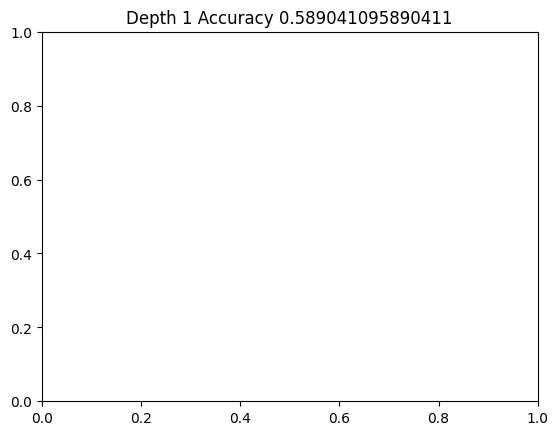

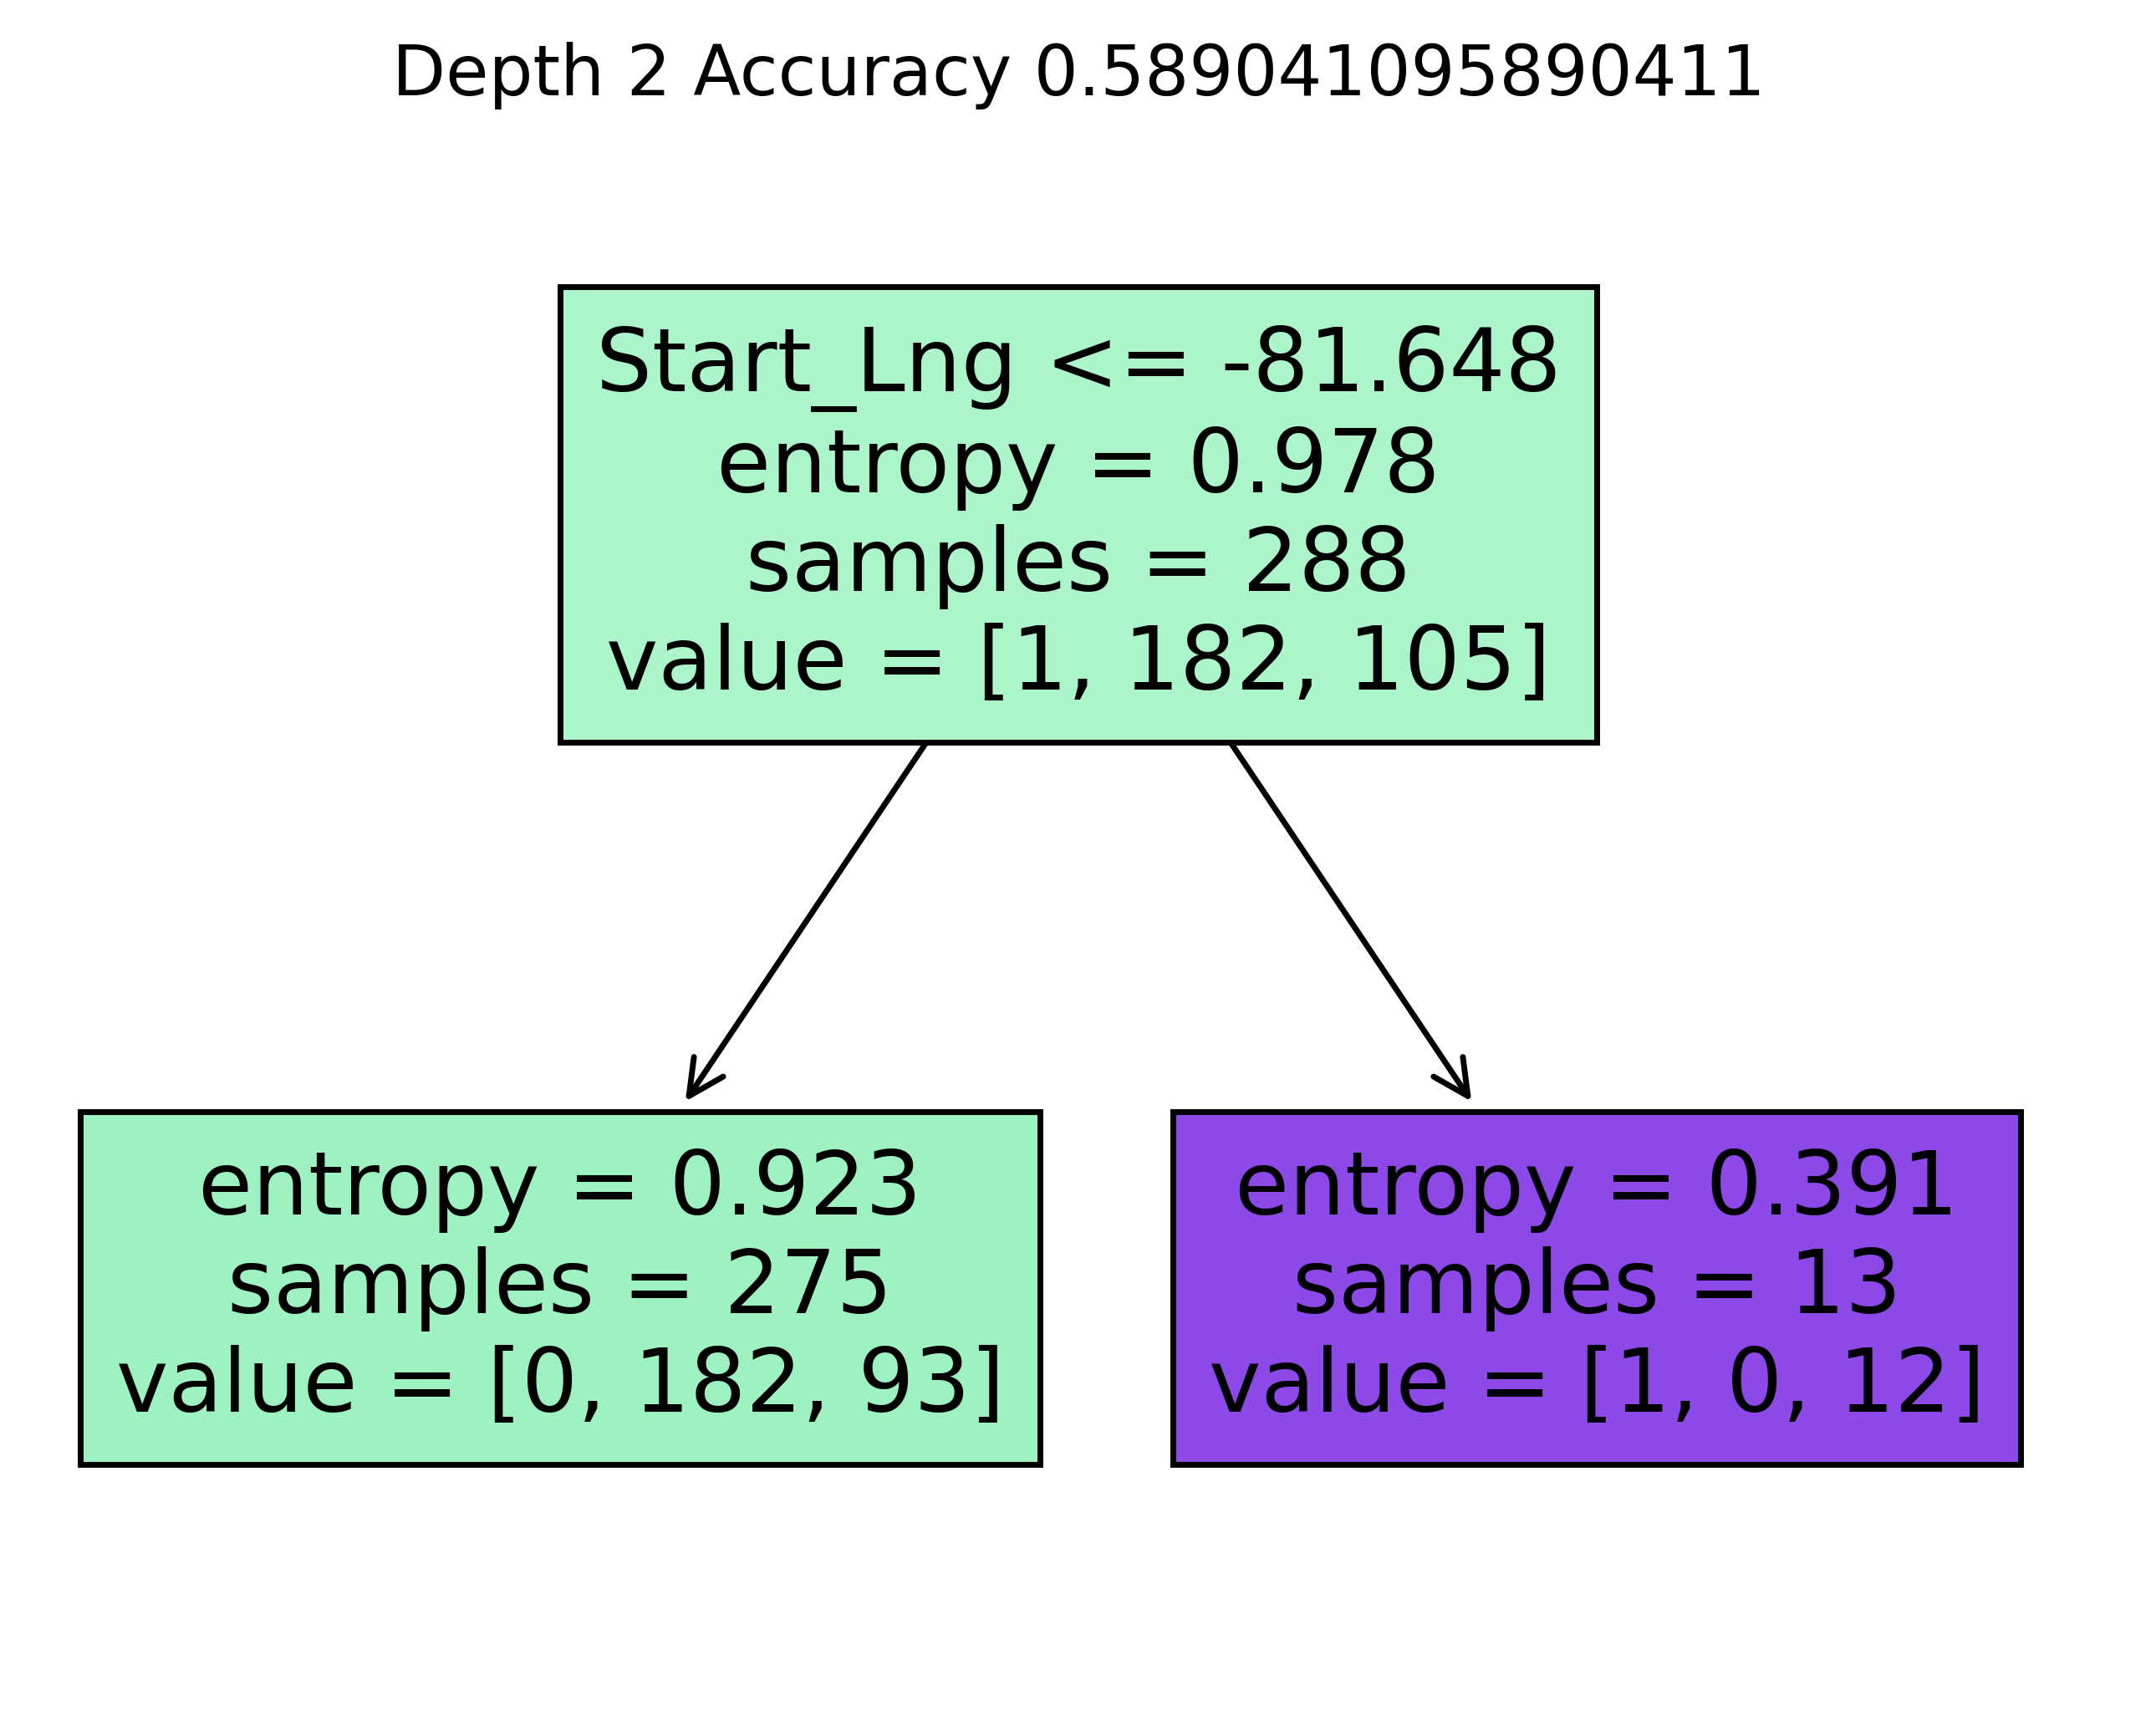

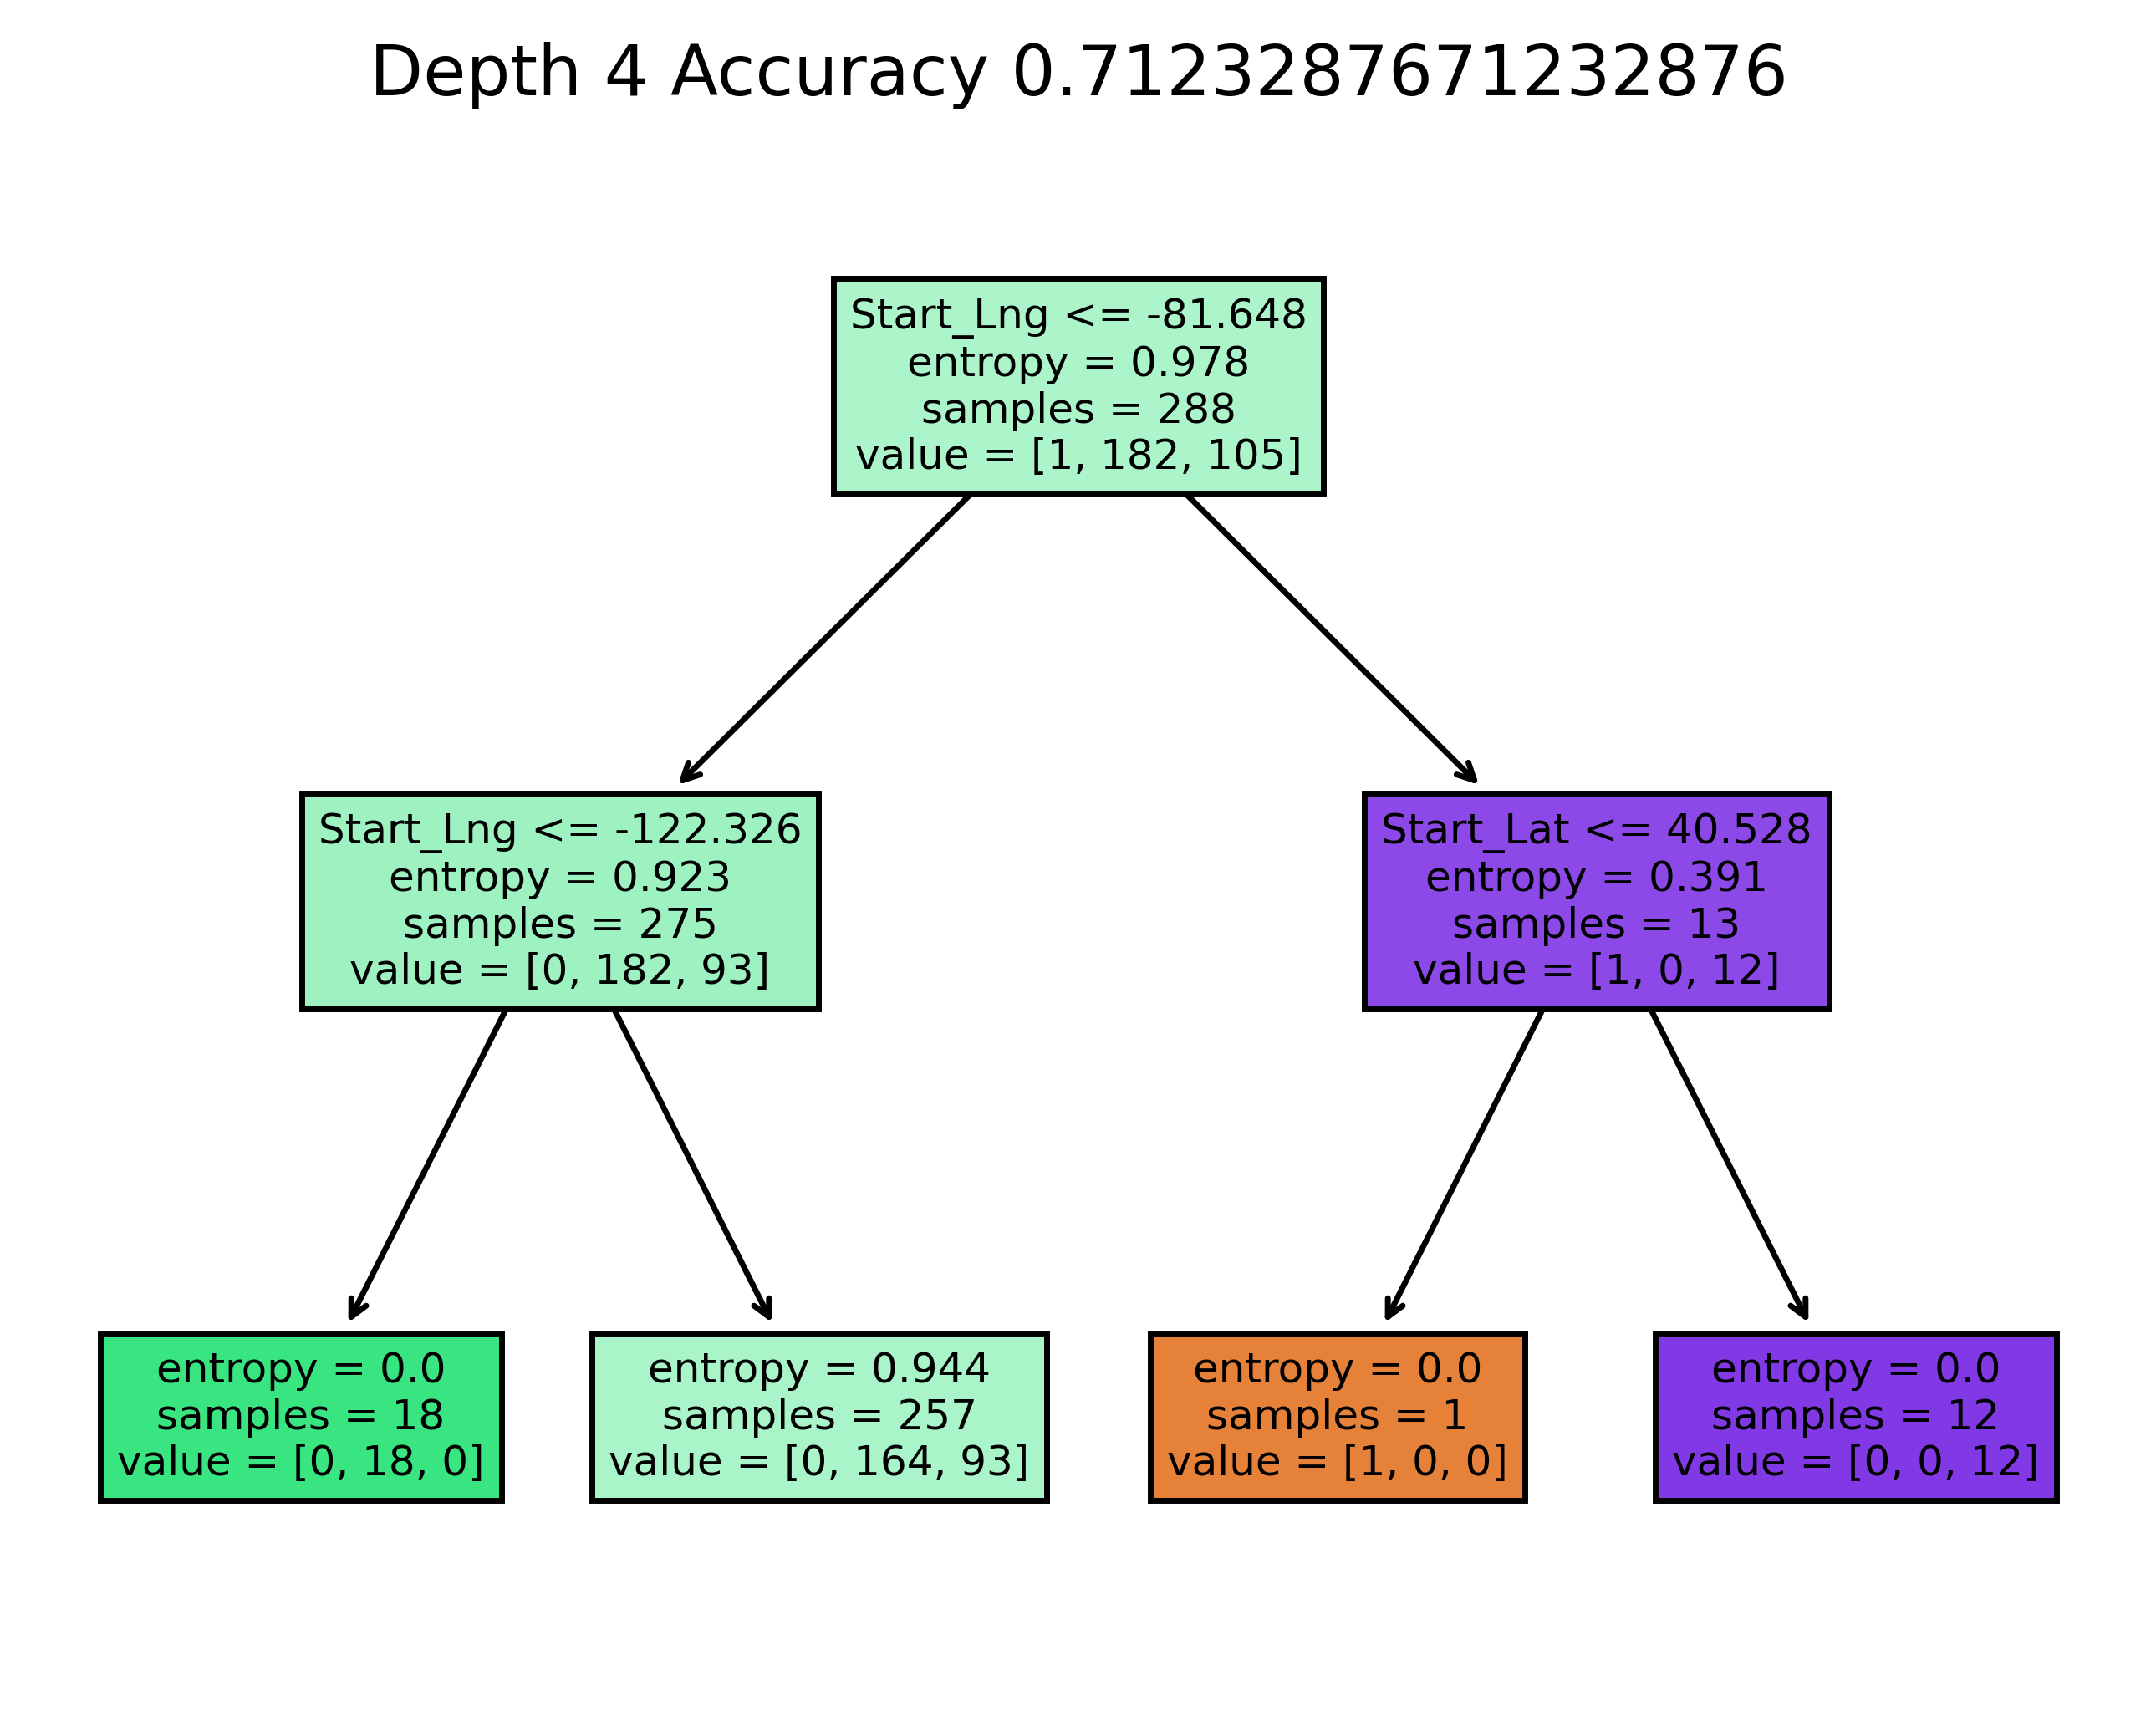

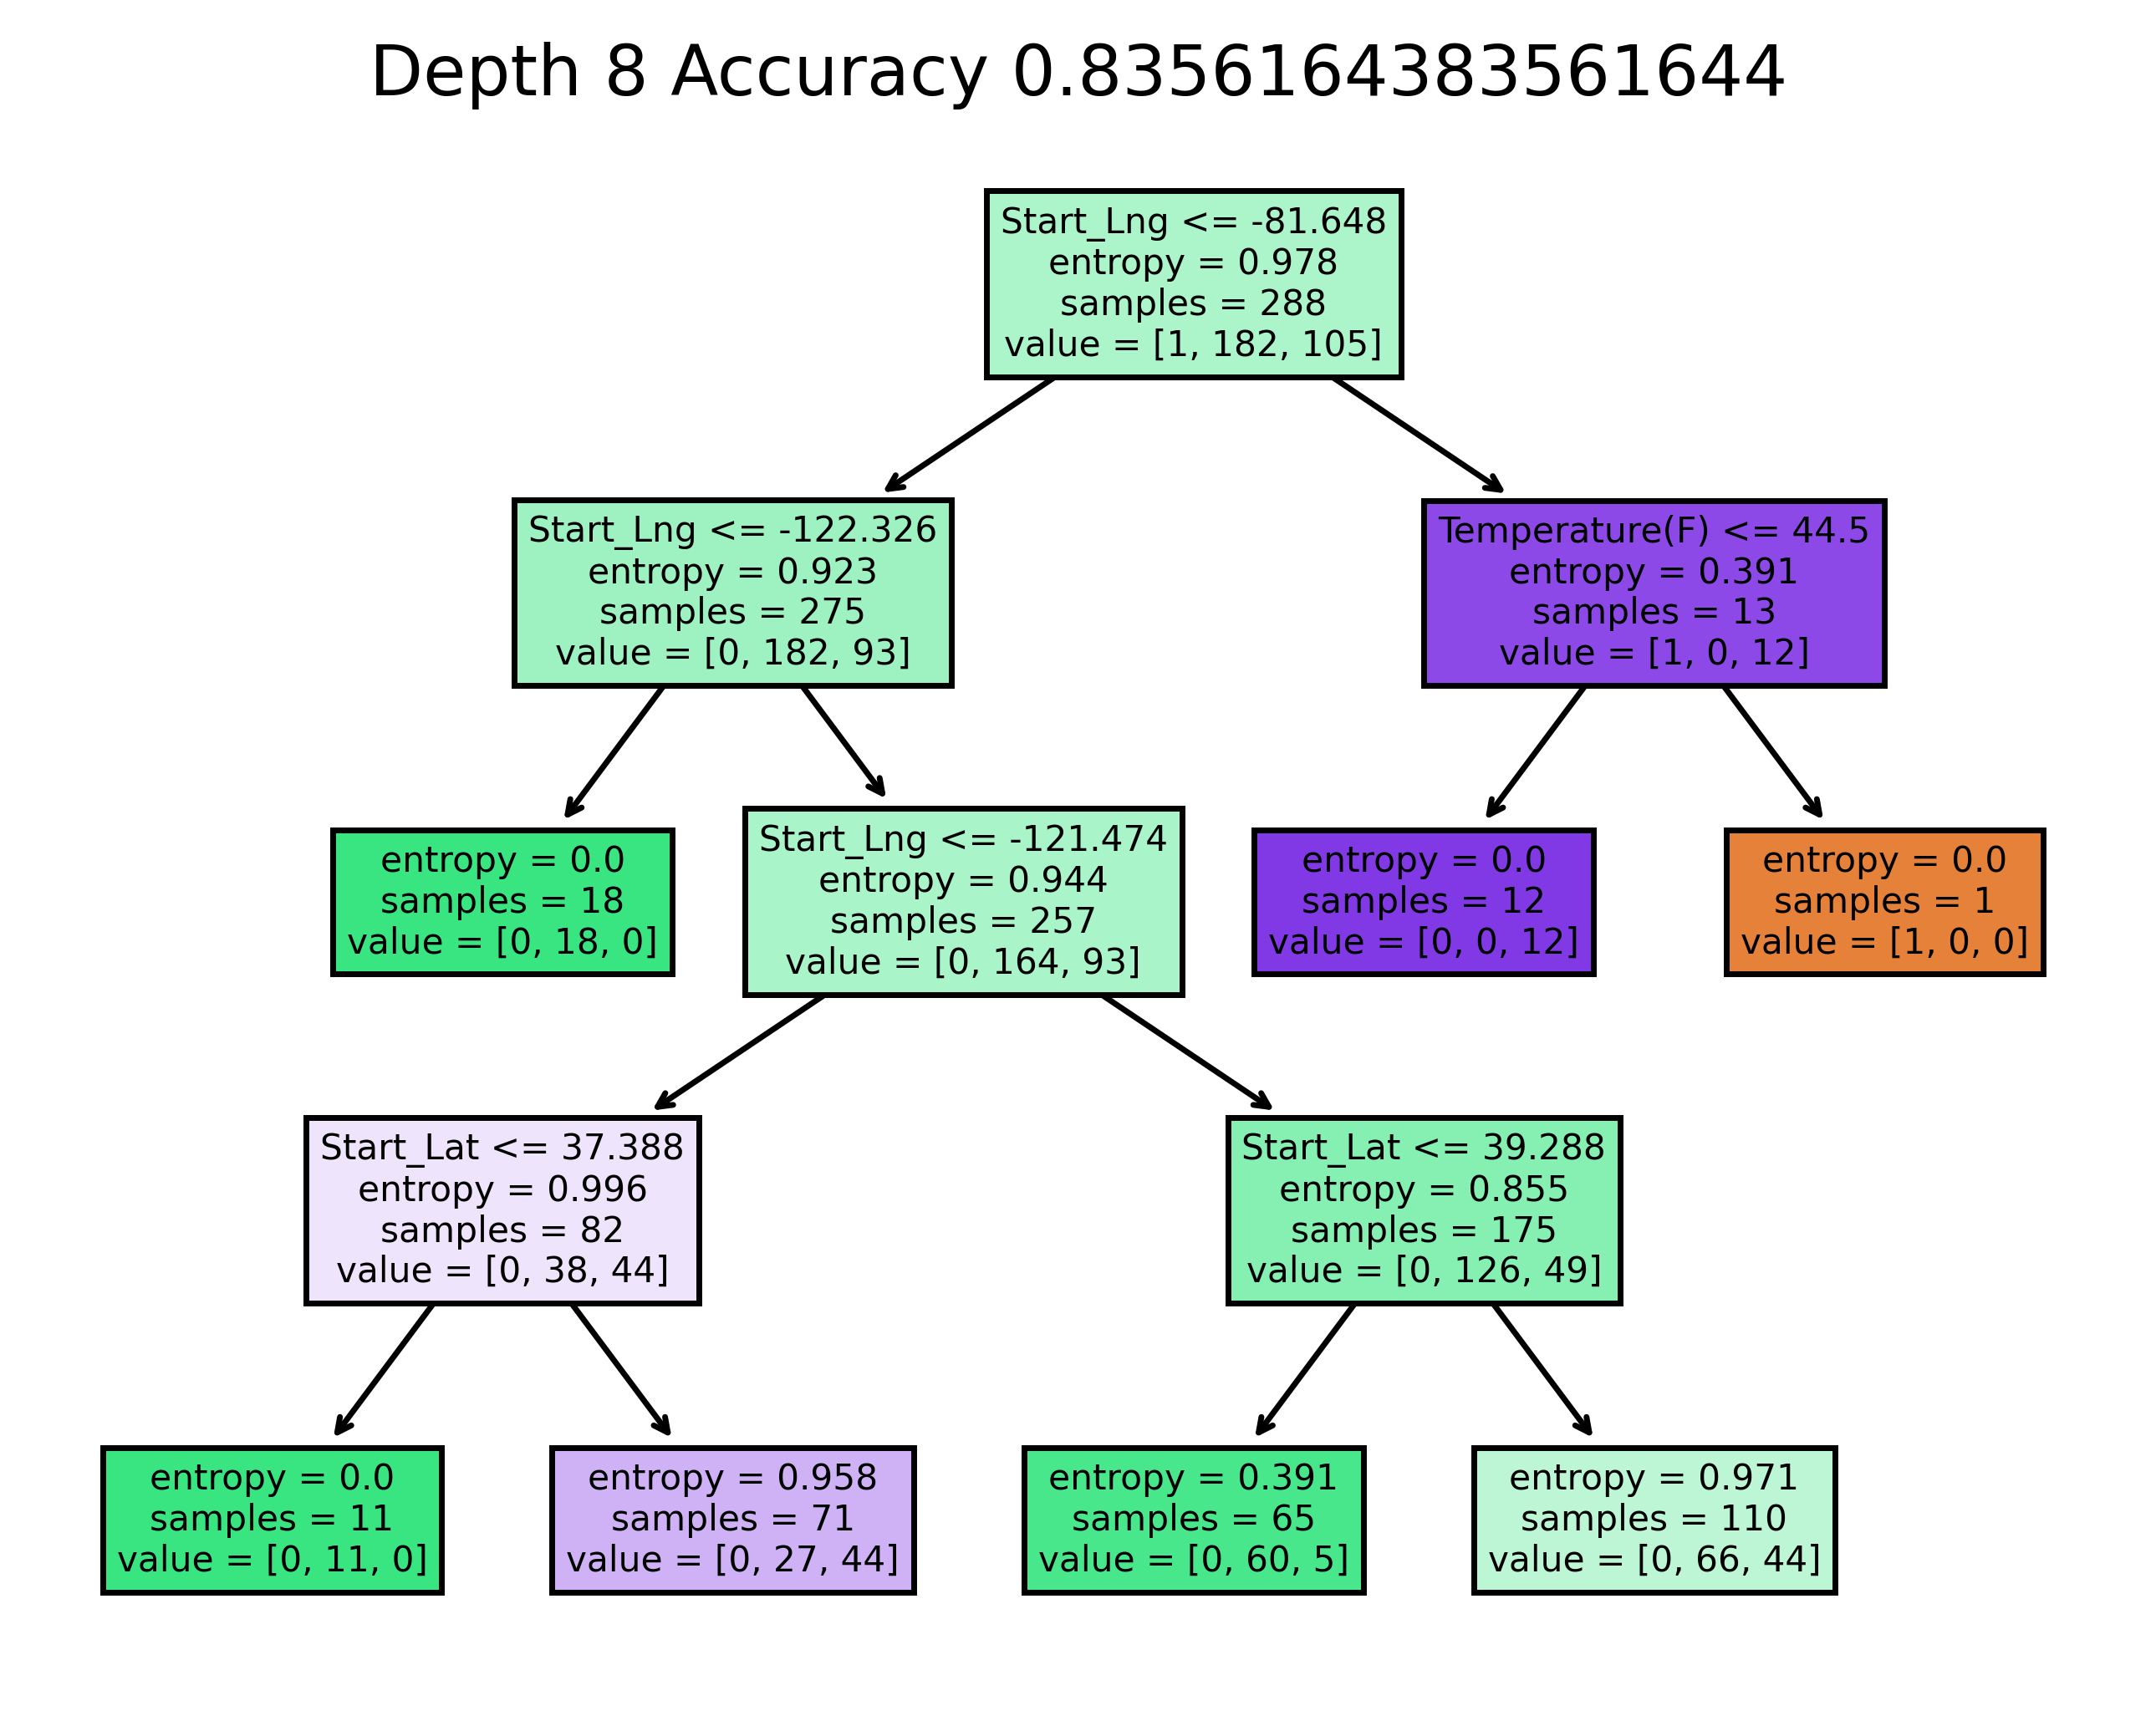

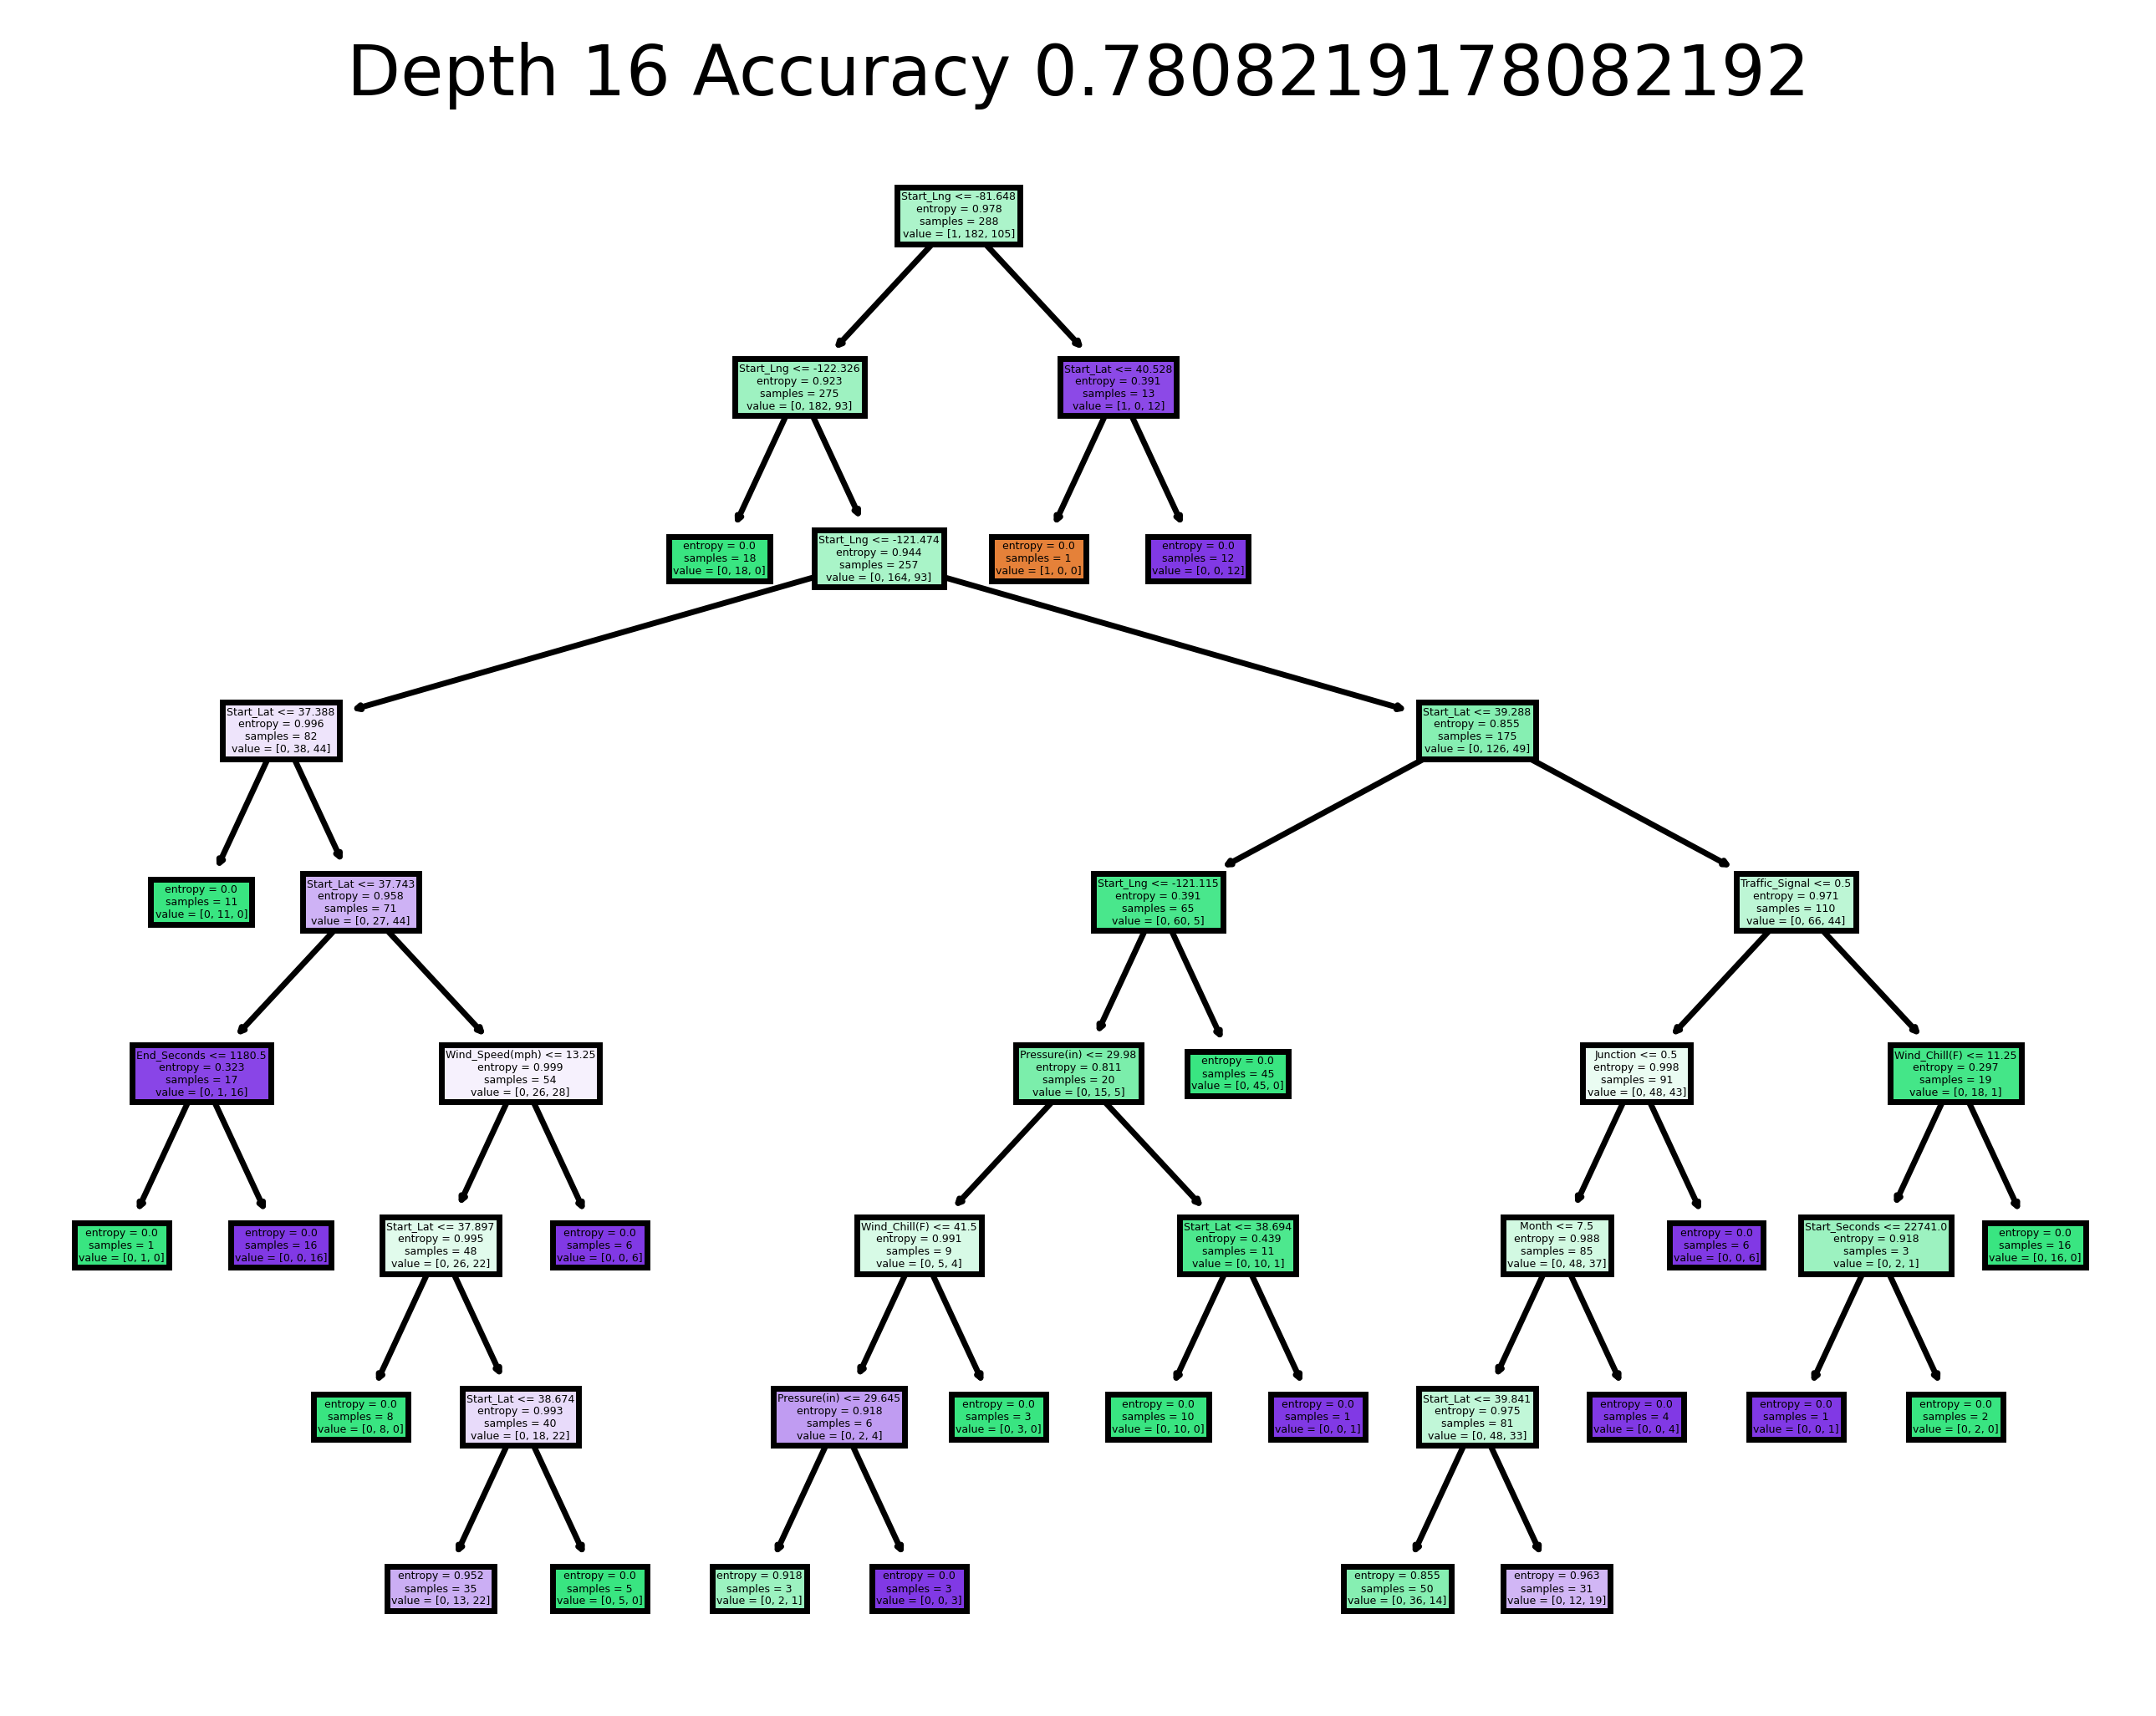

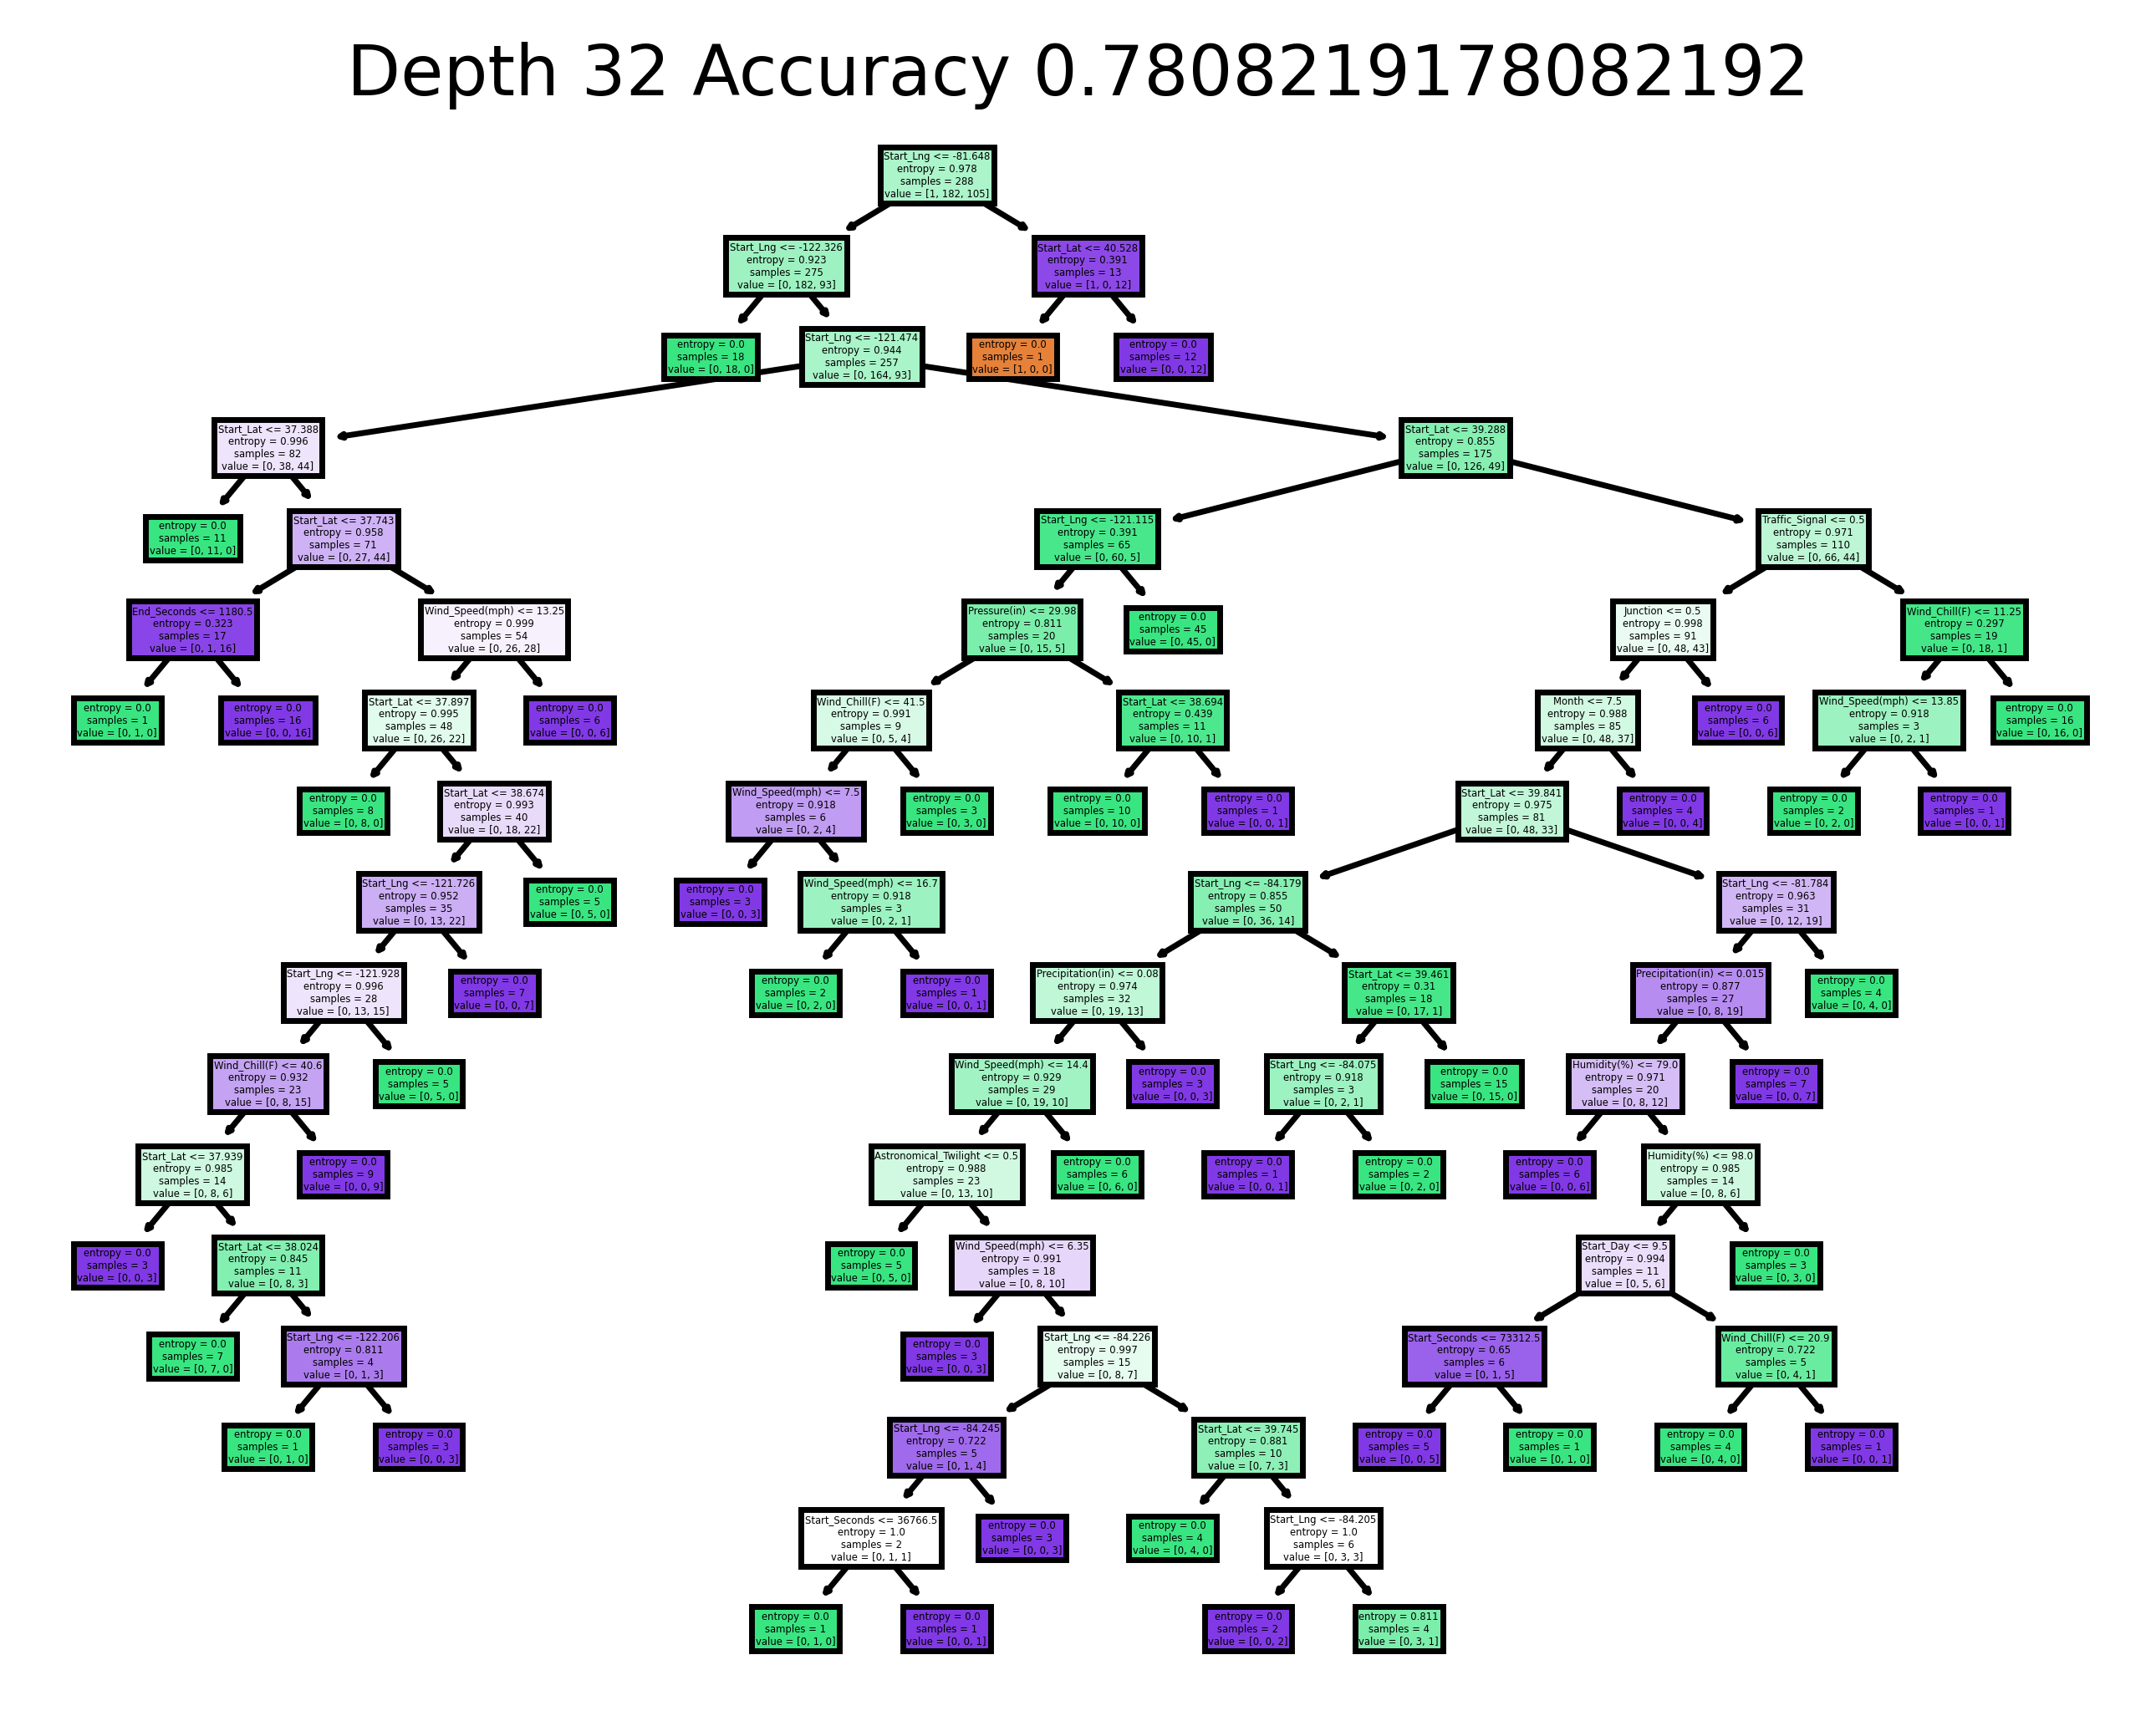

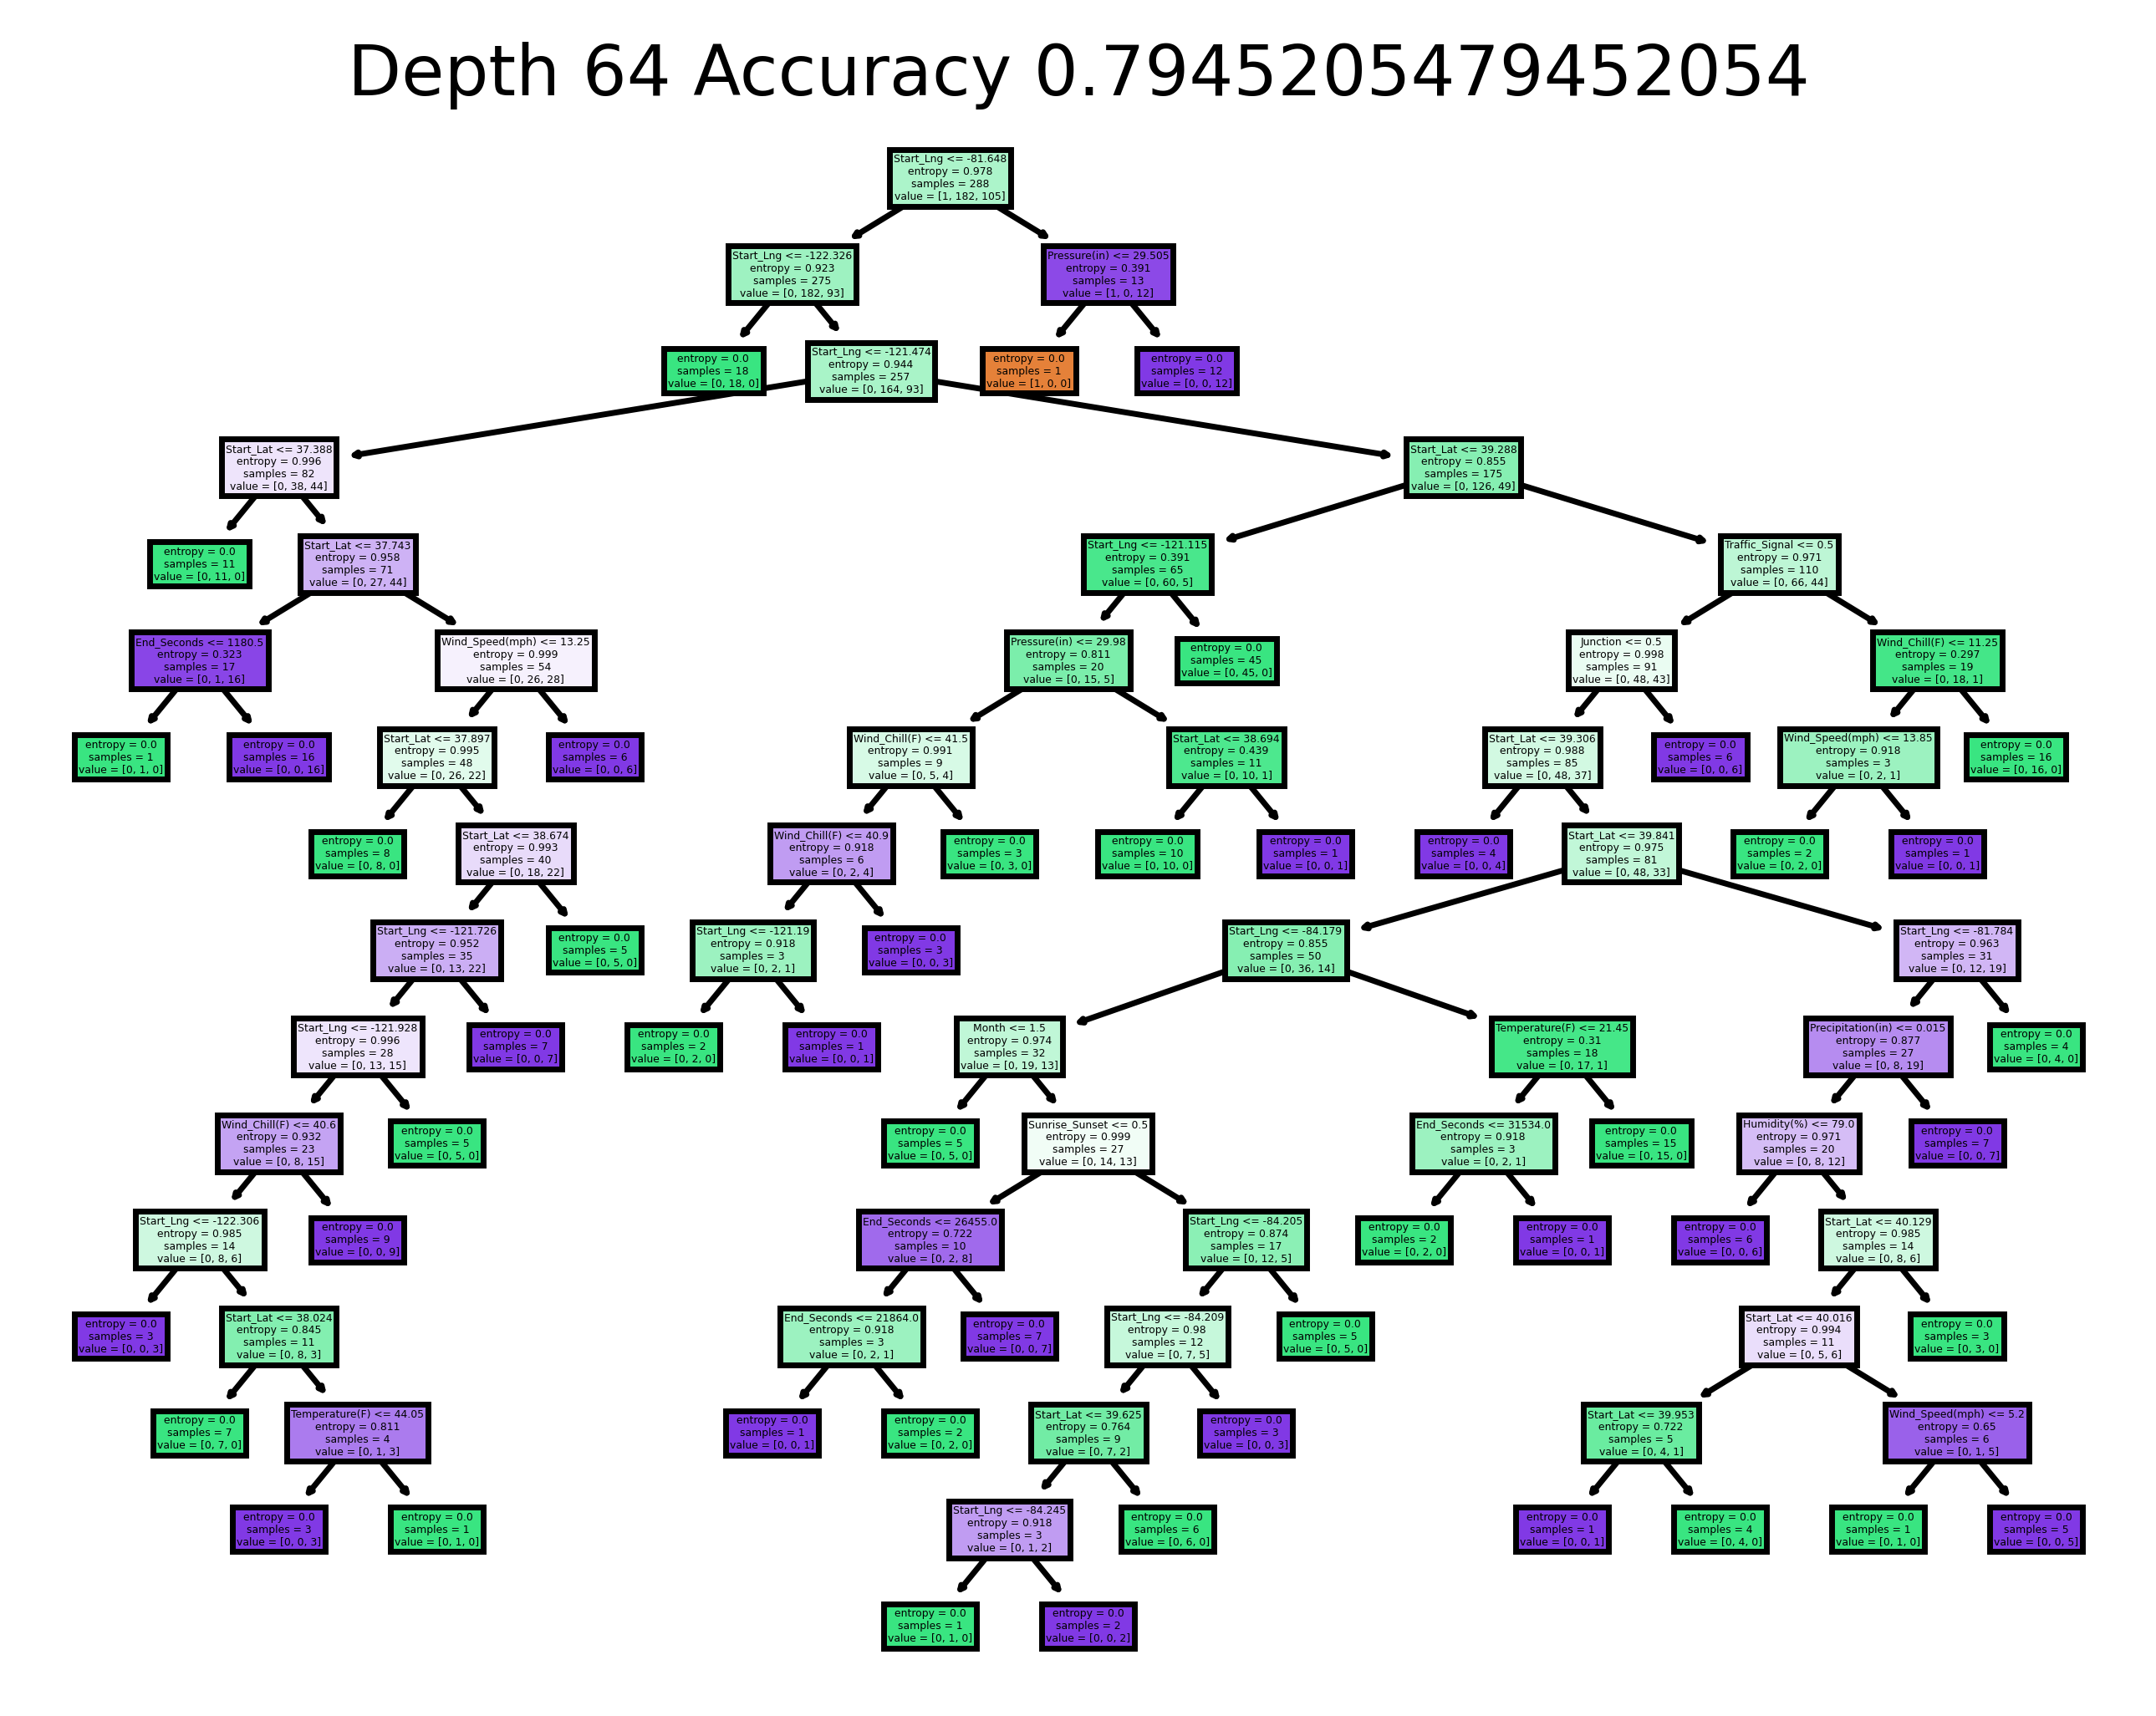

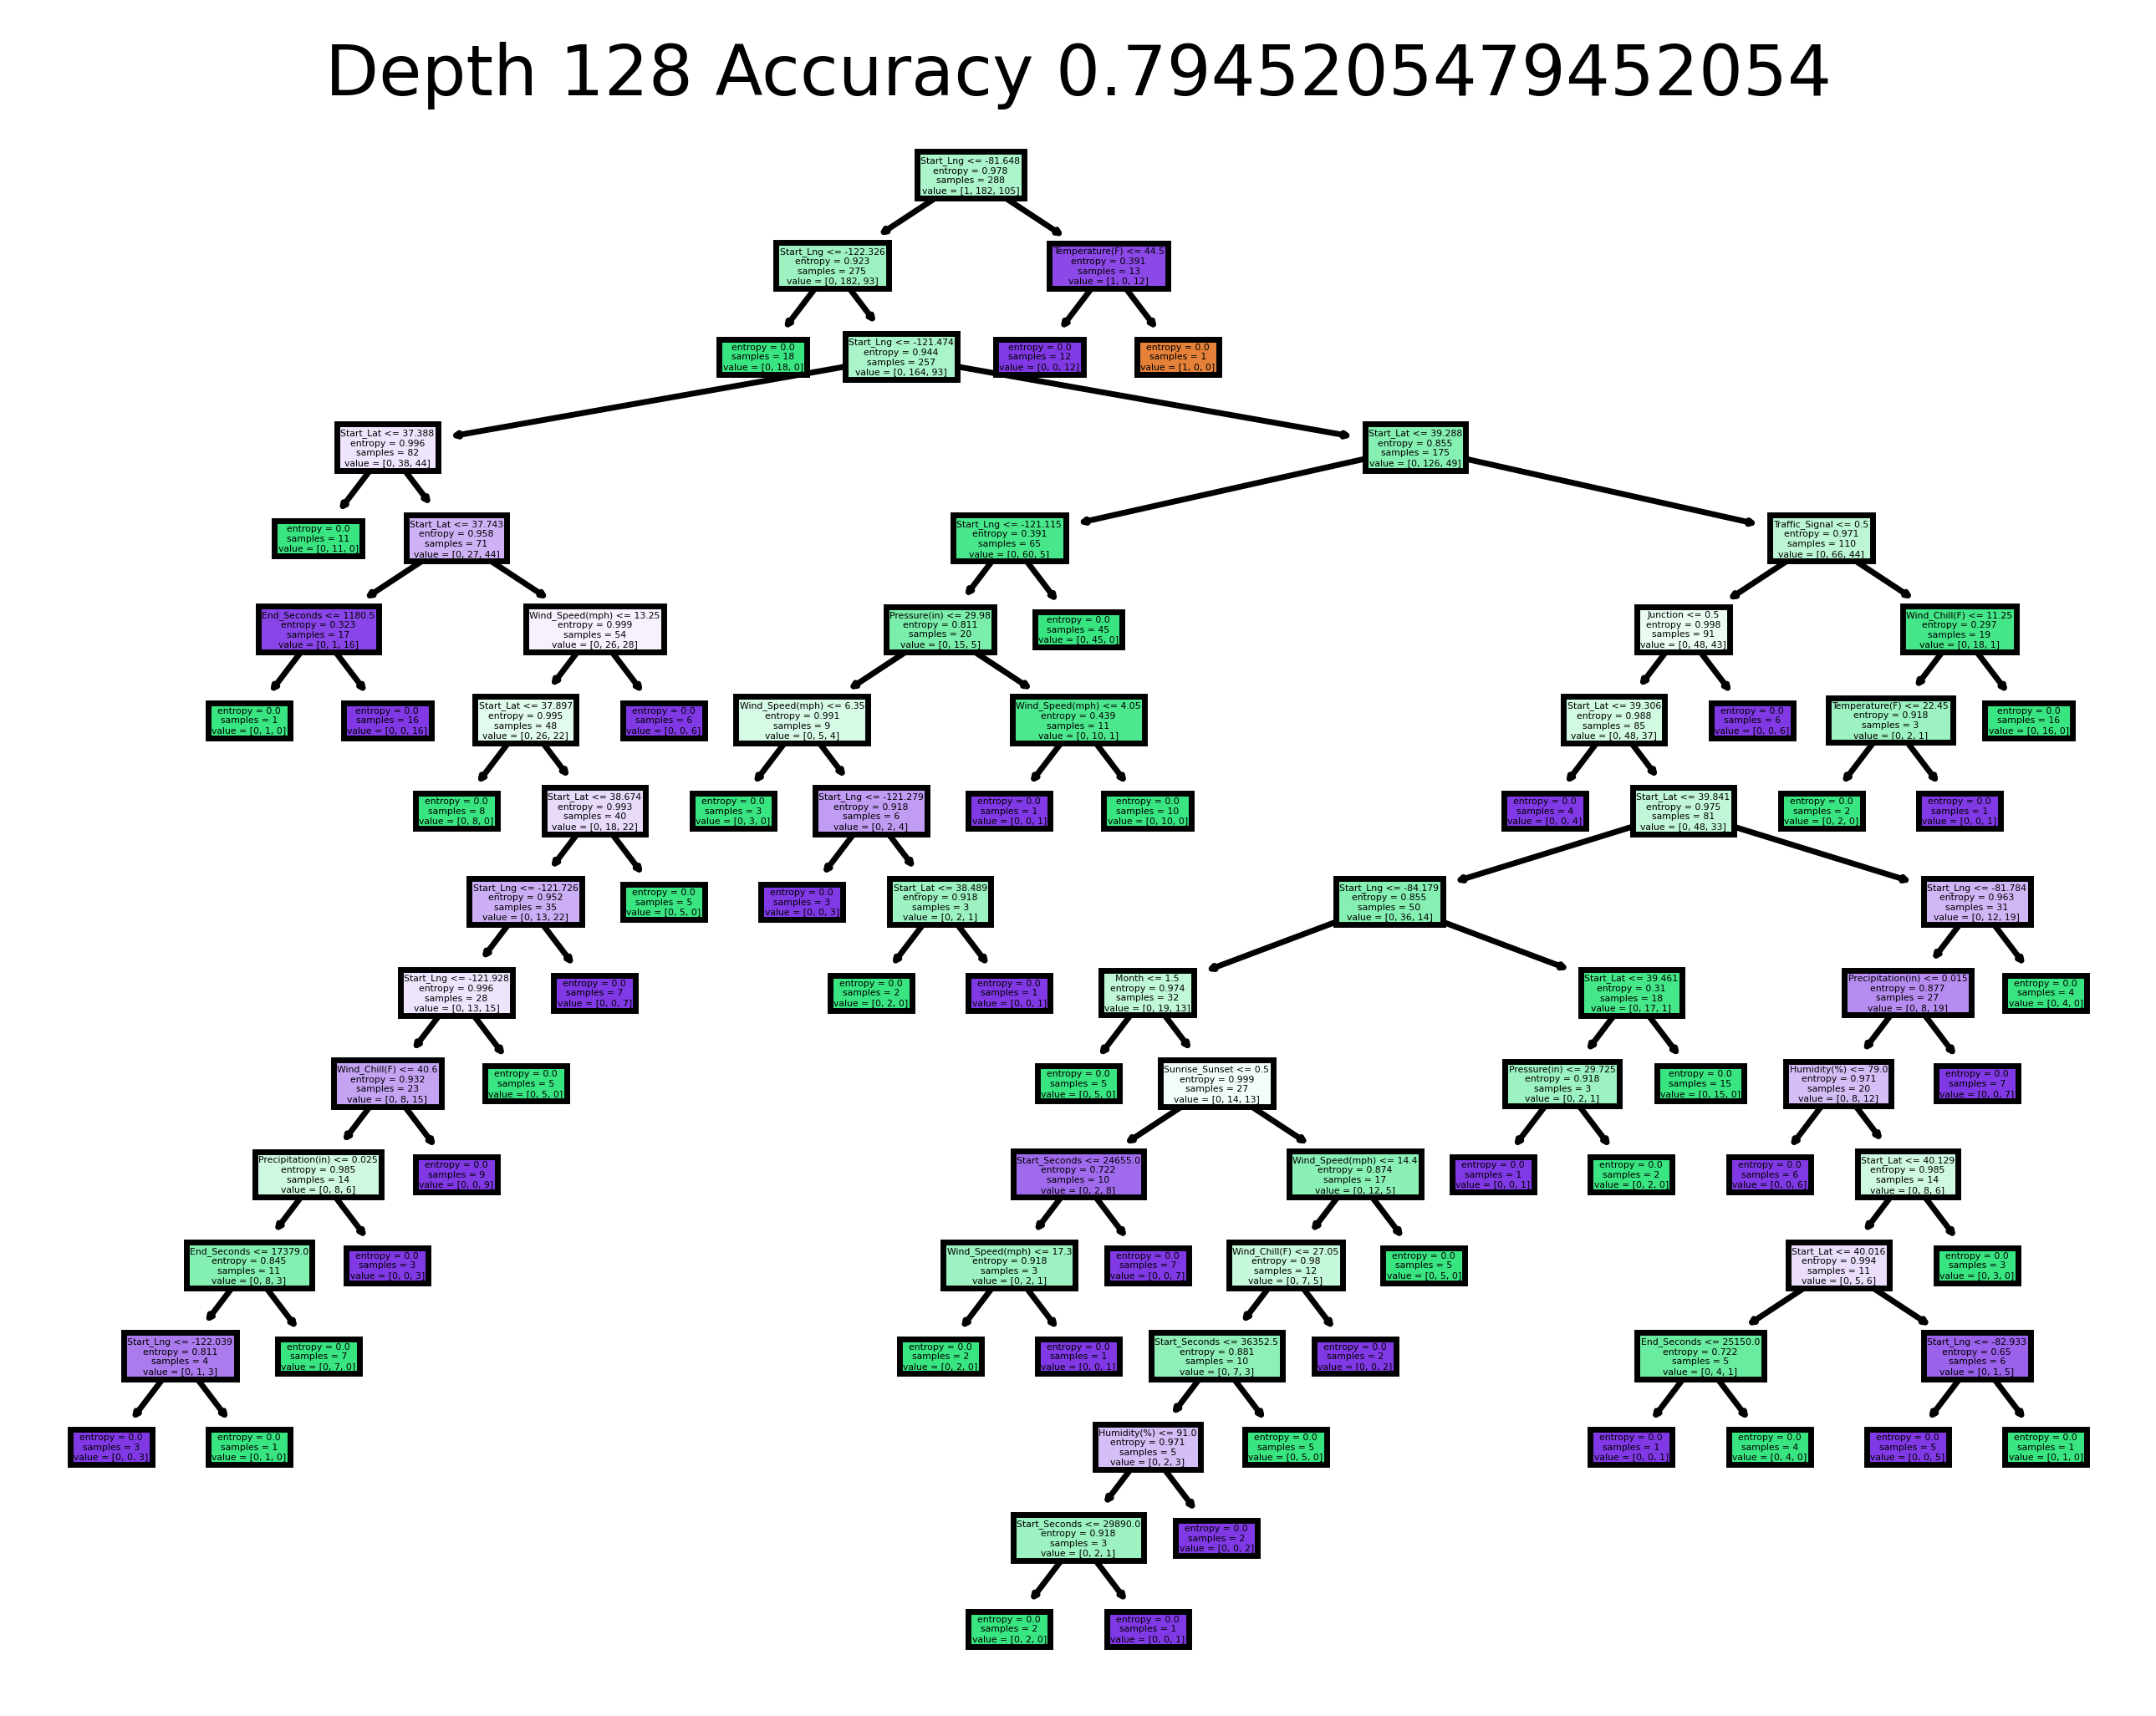

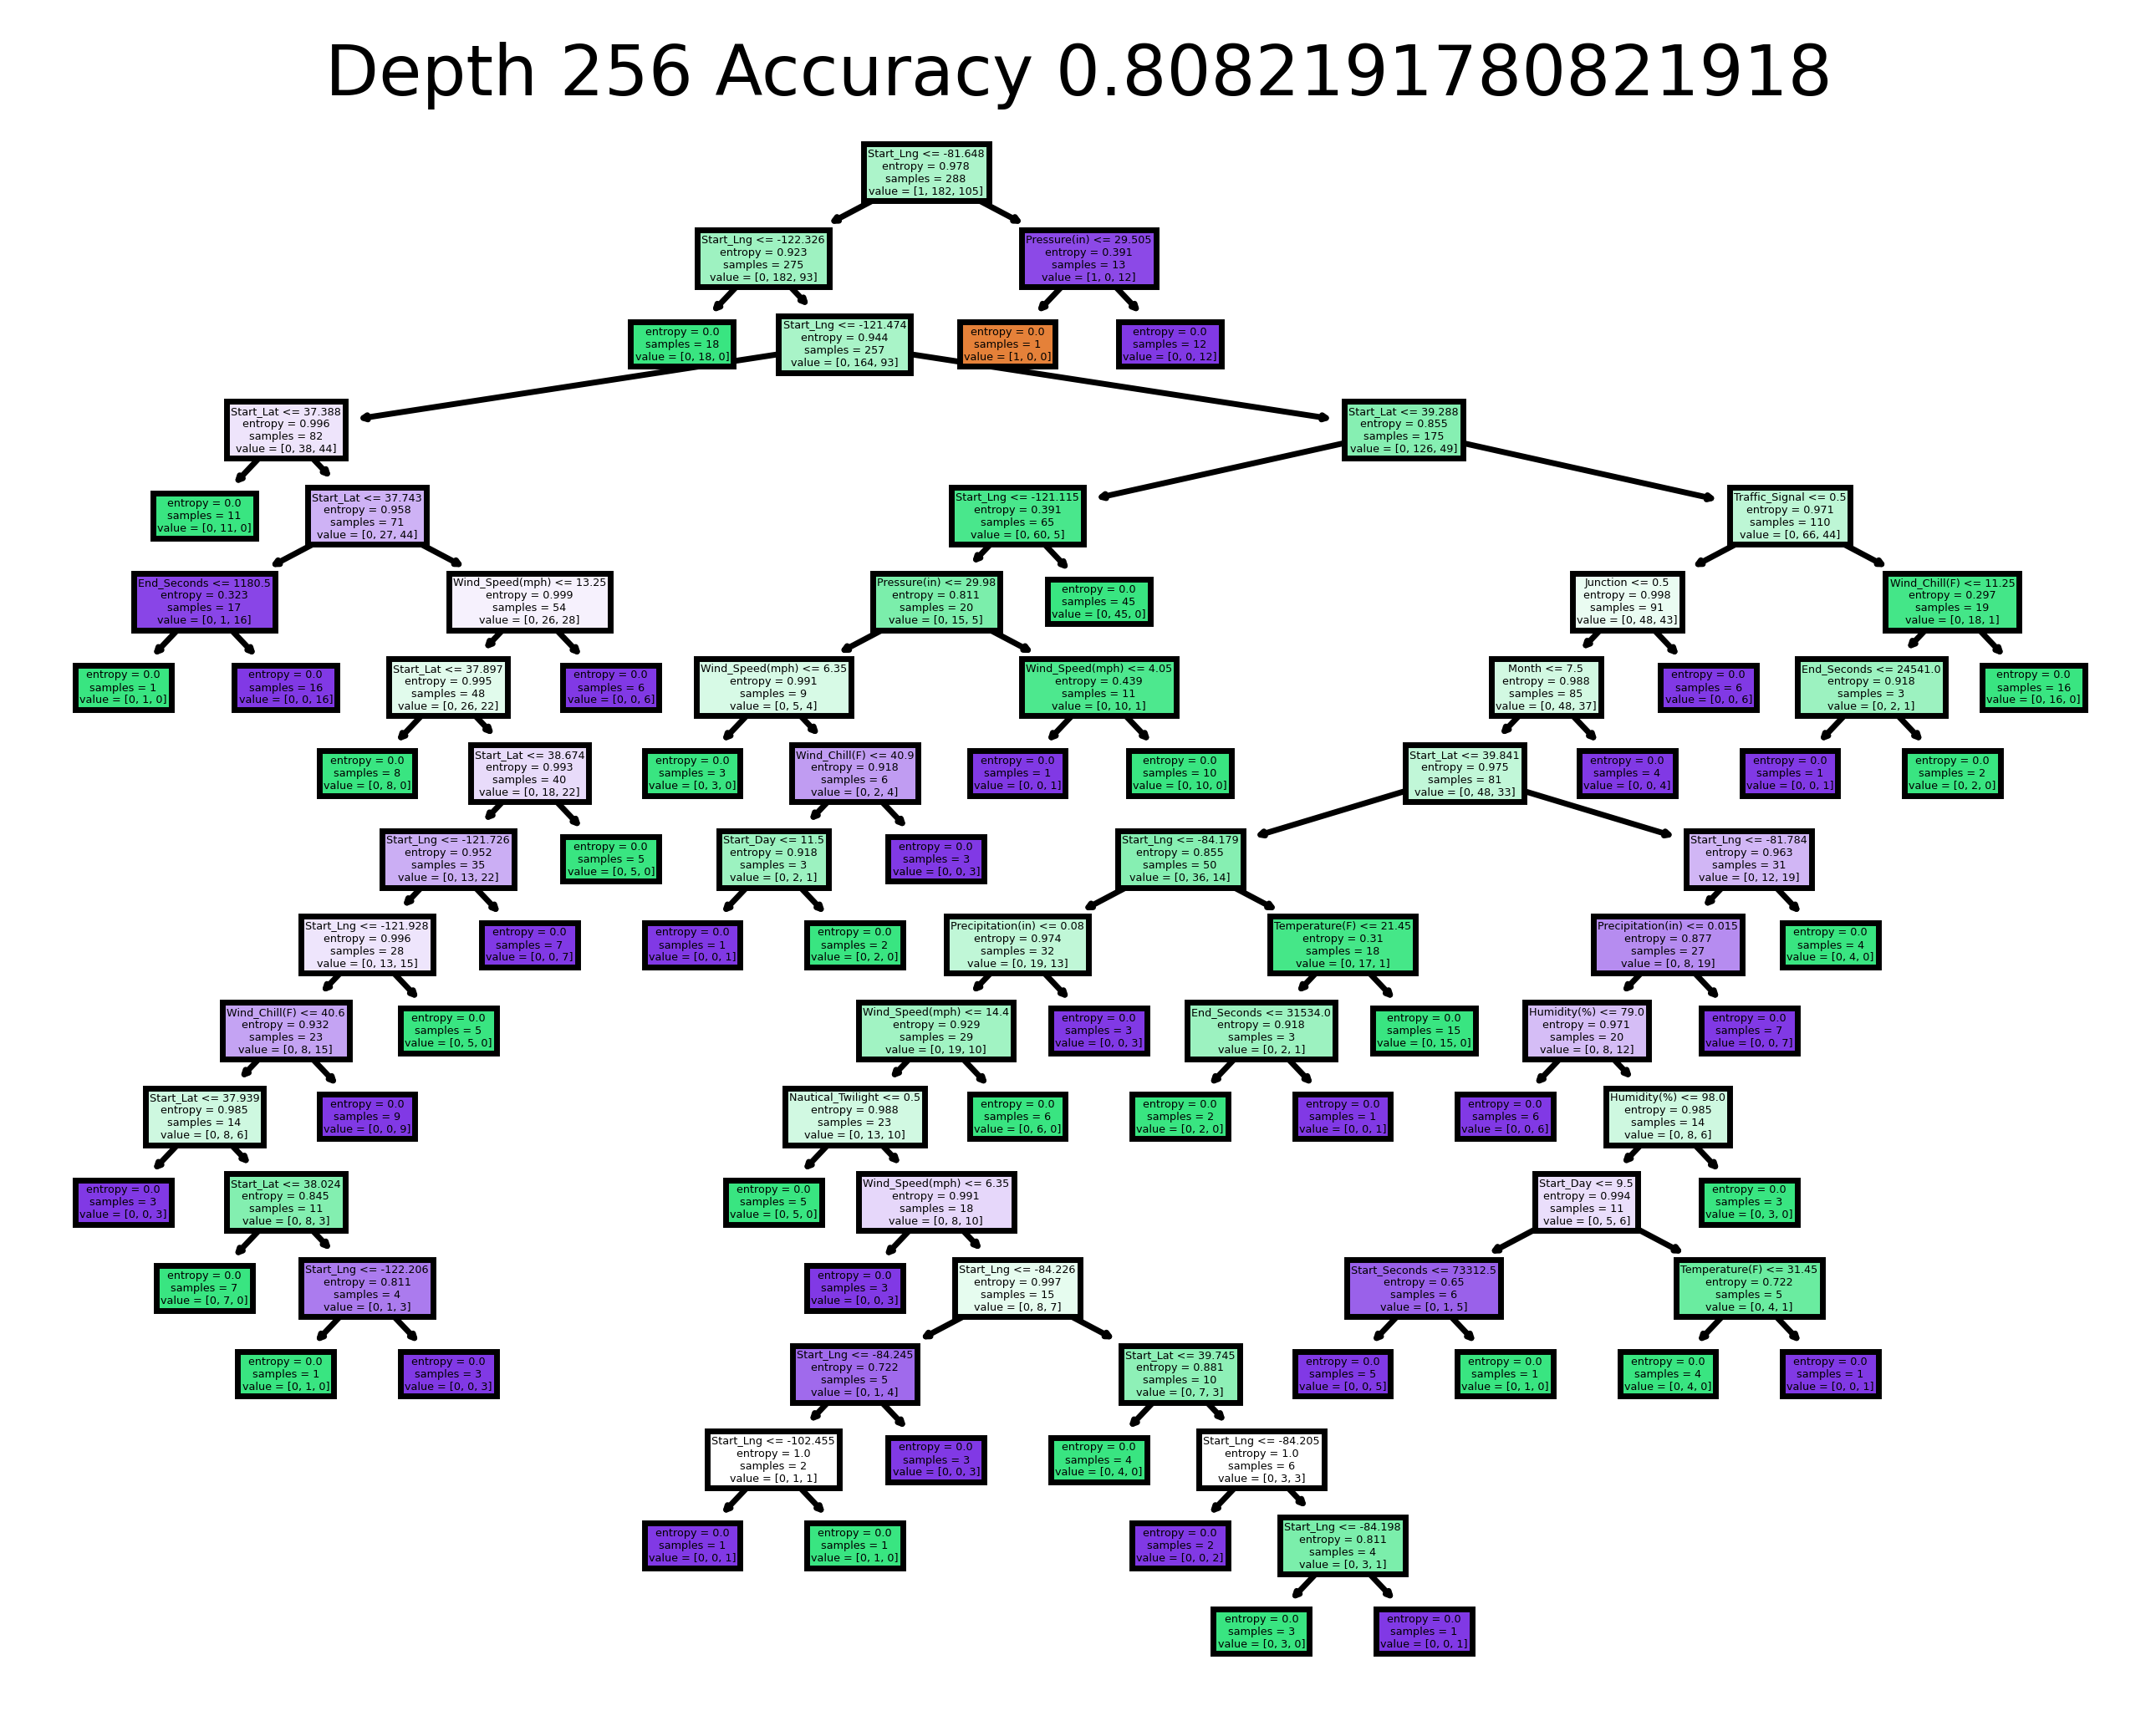

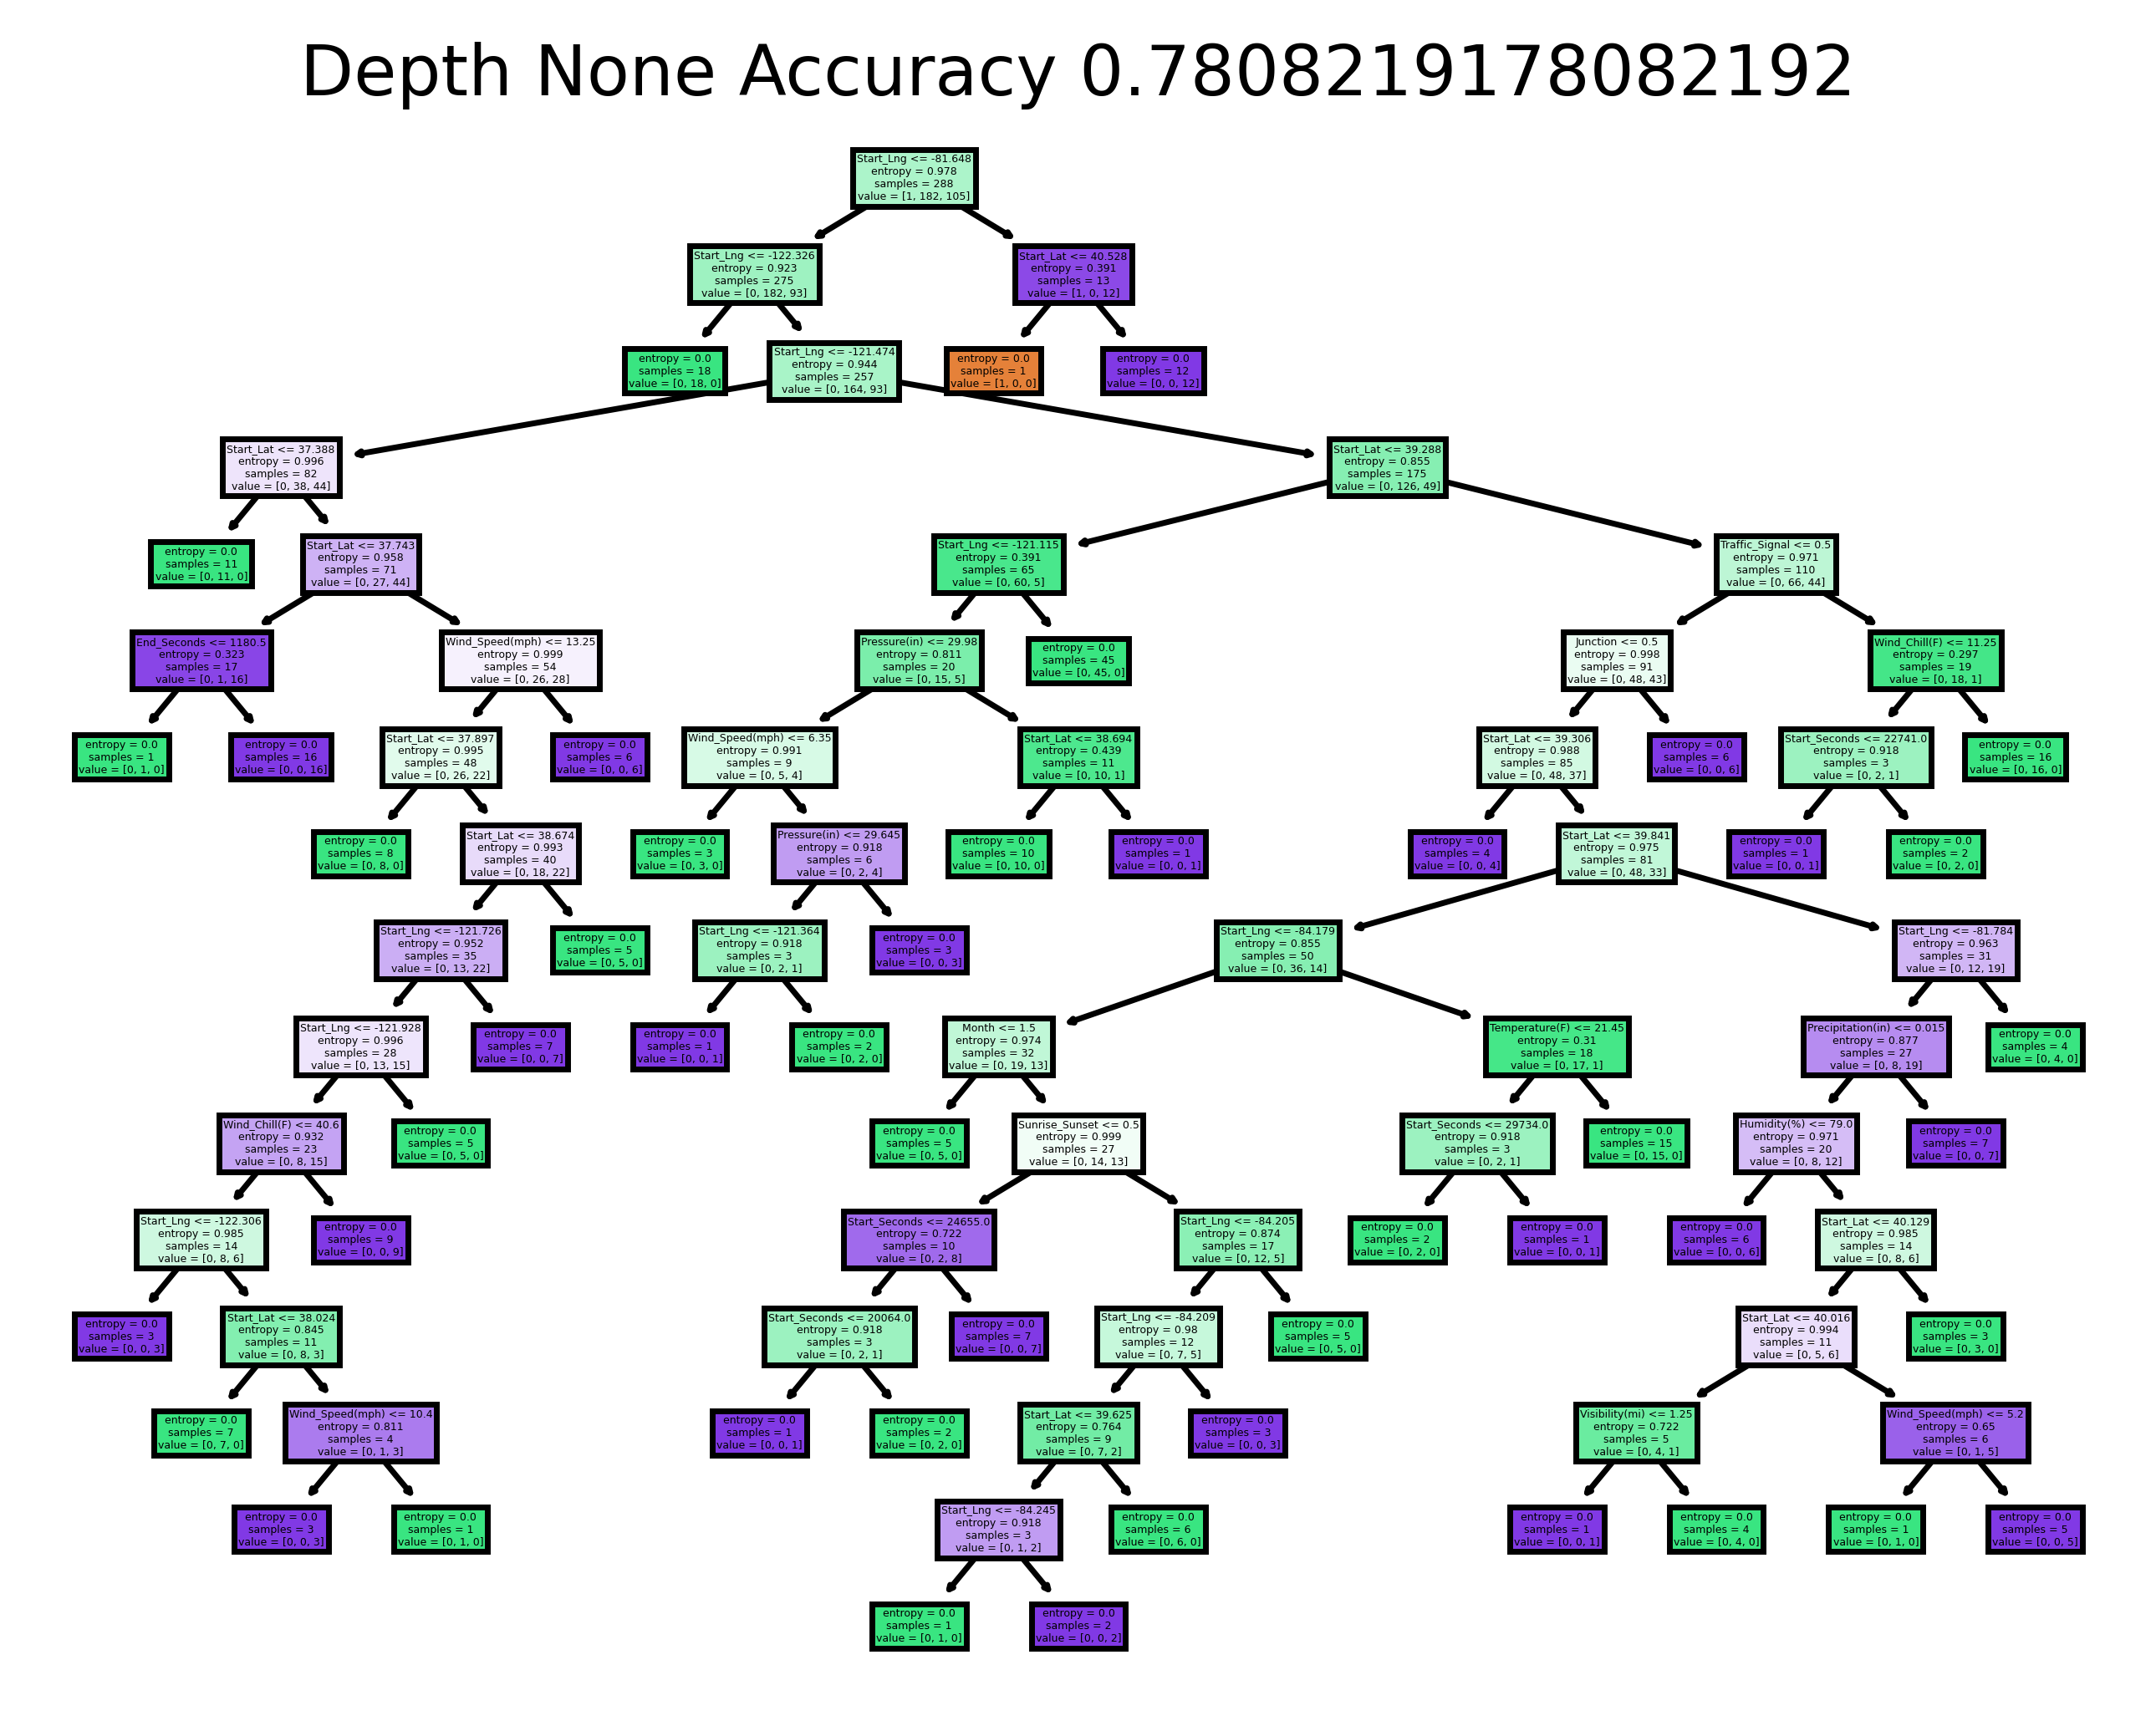

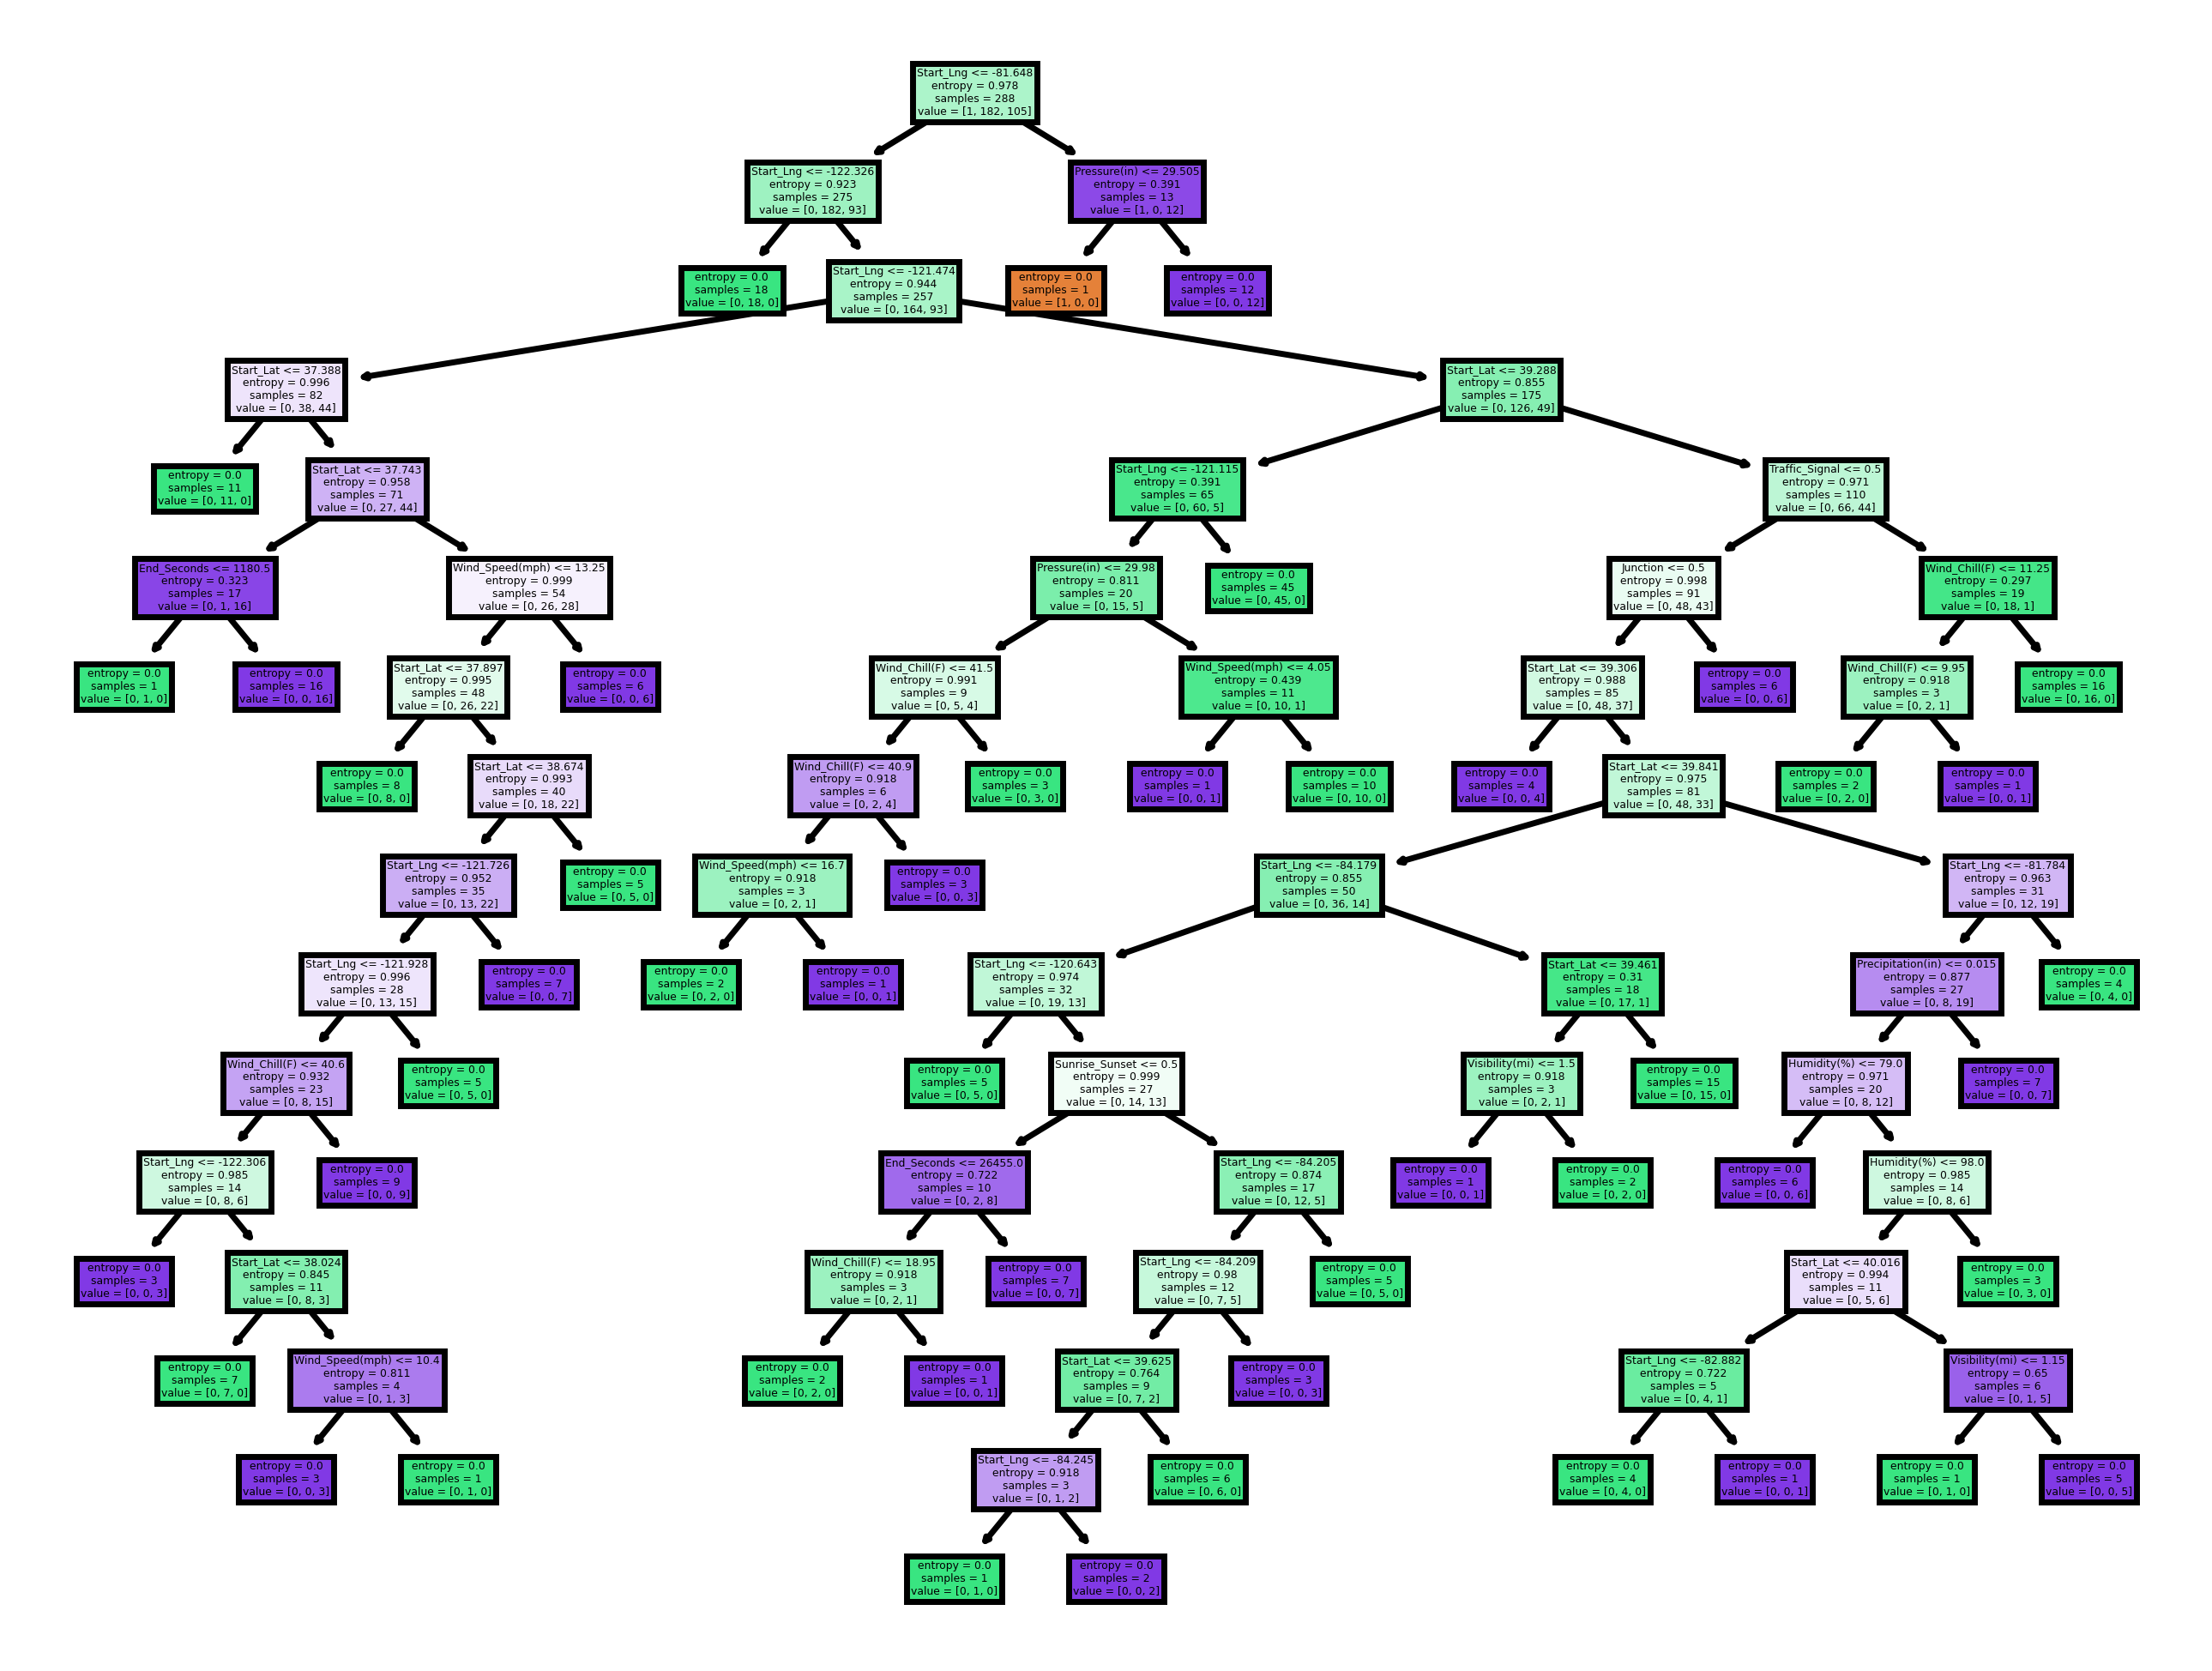

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

features = df.columns
X = df[features].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = [1, 2, 4, 8, 16, 32, 64, 128, 256, None]

file_contents = [
    '# DecisionTreeReport'
]

for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    score = accuracy_score(y_test,y_predict)
    plt.title(f"Depth {depth} Accuracy {score}")
    plt.figure(dpi=500)
    tree.plot_tree(clf,filled=True, feature_names=features.tolist())
    plt.savefig(f'./figures/file{depth}.png')
    file_contents.append(f'## Tree Max Depth {depth}')
    file_contents.append(f'### Accuracy Score: {score}')
    file_contents.append(f'![Figure](./figures/file{depth}.png)')


with open('DecisionTreeReport.md', 'w') as file:
    for line in file_contents:
        file.write(f'{line}\n')